<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:white;
              text-align:center;'>
        AUTOSCOUT24 CAR PRICE PREDICTION (EDA and ML)
    </h1>
    </div>

<h2 align="center"><font color=#20a0ff> Linear Regression Models (Linear-Ridge-Lasso-ElasticNet) </font></h2> 

---
    
<div style="text-align: center;">
  <b>Akshay Shekade | Data Scientist | 2024 </b>
    
  <br>
  Follow me:
  <a href="https://akshayshekade.github.io/">Portfolio</a> | 
  <a href="https://www.linkedin.com/in/akshay-shekade-a225a8135/">Linkedin</a> | 
  <a href="https://github.com/AkshayShekade">GitHub</a> | 
  <a href="https://www.kaggle.com/akshayshekade">Kaggle</a> |
  <a href="https://public.tableau.com/app/profile/akshay.shekade/vizzes">Tableau</a>

    
</div>   


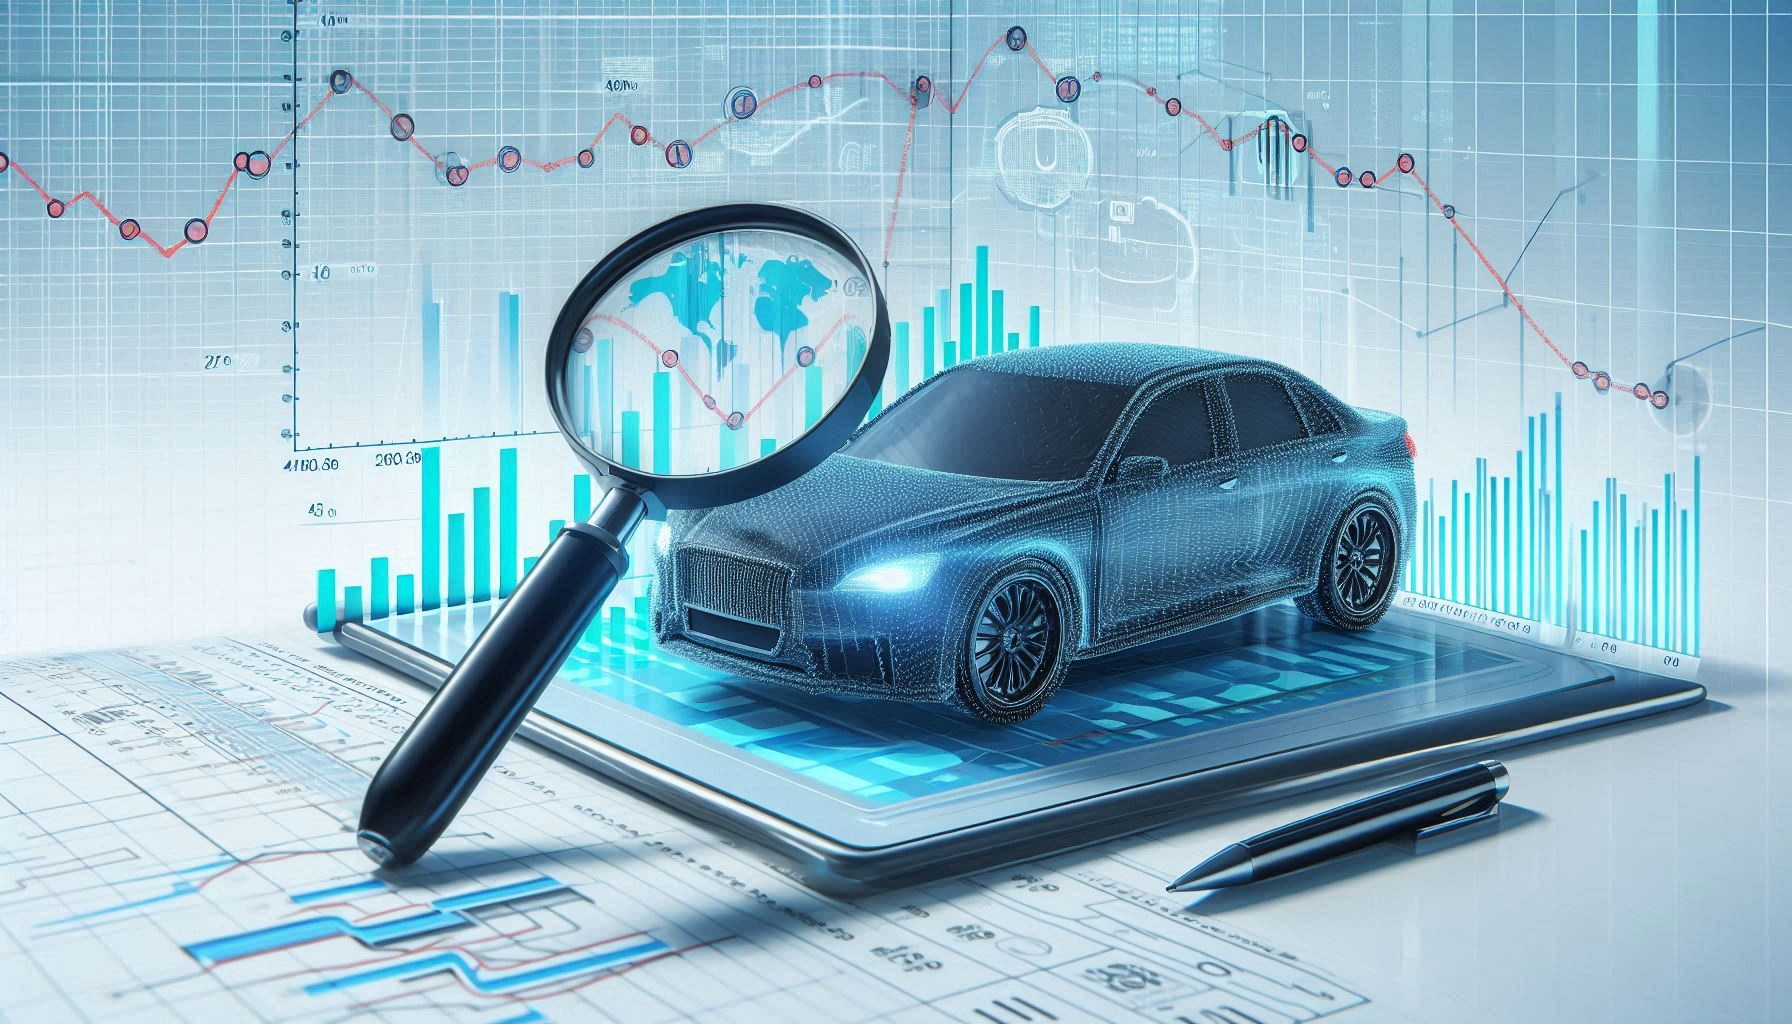

### Table of Content

1. [Intoduction](#1.)
1. [Importing Libraries](#2.)
1. [Reading the Dataset](#3.)
1. [EXPLORATORY DATA ANALYSIS (EDA)](#4.)
    - [Categorical Features](#cat)
    - [Numerical Features](#num)
    - [Correlations](#corr)
    - [Outlier Analysis](#out)
    - [Feature Engineering](#eng)
1. [MACHINE LEARNING](#4.1)
1. [Train | Test Split)](#5.)
1. [Linear Regression](#6.)
1. [Ridge Regression](#7.)
1. [Lasso Regression](#8.)
1. [Elastic-Net Regression](#9.)
1. [Feature Importance)](#10.)
1. [Compare Models Performance](#11.)
1. [Final Model and Predictions](#12.)

### Introduction

- This project aims to predict car prices using the Auto Scout dataset from AutoScout24, containing features of 9 different car models. 
- By performing Exploratory Data Analysis (EDA) and implementing machine learning models, the goal is to gain insights into the data and build effective regression models for car price prediction.
- Additionally, these models can support automotive industry stakeholders in understanding market trends, optimizing pricing strategies, and making data-driven decisions. Consumers can also benefit by making informed choices when selecting vehicles.
- Ultimately, the goal is to leverage data-driven insights to enhance the understanding of the automotive market, improve pricing accuracy, and support sustainable development in the automotive industry. 

### Objectives

1. **Understand the dataset and its features.**
2. **Clean and prepare the data for modeling.**
3. **Implement various regression algorithms to predict car prices.**
4. **Optimize model performance by tuning hyperparameters and focusing on important features.**
5. **Compare the performance of different regression algorithms.**



*The dataset and results are used for educational purposes, demonstrating the application of advanced machine learning techniques on real-world data. We aim to build effective regression models to predict car prices and gain a deeper understanding of machine learning techniques.*

### About the Dataset
The **Auto Scout** data is sourced from the online car trading company [AutoScout24](https://www.autoscout24.com) in 2019 and contains various features of 9 different car models. This project uses a pre-processed and organized dataset to explore and understand machine learning algorithms, particularly for car price prediction using regression techniques.

**Dataset:** AutoScout24 Car Sales Dataset  
- **Content:** Data on various features of 9 different car models.  
- **Number of Rows:** 15,915  
- **Number of Columns:** 23  

**Inputs:**
- **make_model:** The make and model of the car
- **body_type:** The type of the car (e.g., Sedan)
- **price:** The price of the car (in EUR)
- **vat:** VAT status
- **km:** The car's mileage
- **Type:** The condition of the car (e.g., used)
- **Fuel:** The type of fuel (e.g., Diesel, Petrol)
- **Gears:** Number of gears
- **Comfort_Convenience:** Comfort and convenience features
- **Entertainment_Media:** Entertainment and media features
- **Extras:** Extra features
- **Safety_Security:** Safety and security features
- **age:** The age of the car
- **Previous_Owners:** Number of previous owners
- **hp_kW:** Engine power (in kW)
- **Inspection_new:** New inspection status
- **Paint_Type:** Type of paint
- **Upholstery_type:** Type of upholstery
- **Gearing_Type:** Type of gearing (e.g., automatic)
- **Displacement_cc:** Engine displacement (in cc)
- **Weight_kg:** The weight of the car (in kg)
- **Drive_chain:** Type of drive (e.g., front-wheel drive)
- **cons_comb:** Combined fuel consumption (L/100 km)

<a id="4."></a>
# 1. EXPLORATORY DATA ANALYSIS (EDA)

<a id="2."></a>
## Import the Libraries

In [9]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline  

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

<a id="3"></a>
## Read the Dataset

In [11]:
df0 = pd.read_csv('autoscout_car_sales.csv')
df = df0.copy()

In [12]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

## Rename the Columns

In [15]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [16]:
df.rename(columns={
    'make_model': 'make_model',
    'body_type': 'body_type',
    'price': 'price',
    'vat': 'vat',
    'km': 'km',
    'Type': 'type',
    'Fuel': 'fuel_type',
    'Gears': 'gears_num',
    'Comfort_Convenience': 'comfort_convenience',
    'Entertainment_Media': 'entertainment_media',
    'Extras': 'extras',
    'Safety_Security': 'safety_security',
    'age': 'age',
    'Previous_Owners': 'previous_owners',
    'hp_kW': 'hp_kw',
    'Inspection_new': 'inspection_new',
    'Paint_Type': 'paint_type',
    'Upholstery_type': 'upholstery_type',
    'Gearing_Type': 'gearing_type',
    'Displacement_cc': 'displacement_cc',
    'Weight_kg': 'weight_kg',
    'Drive_chain': 'drive_chain',
    'cons_comb': 'fuel_cons_comb'
}, inplace=True)


In [17]:
df.columns 

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel_type',
       'gears_num', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'fuel_cons_comb'],
      dtype='object')

## Check Missing Values

In [19]:
# Check out the missing values

missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
make_model,0,0.000
body_type,0,0.000
price,0,0.000
vat,0,0.000
km,0,0.000
type,0,0.000
fuel_type,0,0.000
gears_num,0,0.000
comfort_convenience,0,0.000
entertainment_media,0,0.000


## Check Duplicated Values

In [21]:
# Let's observe first the unique values

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [22]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make_model,9,"[Audi A1, Audi A2, Audi A3, Opel Astra, Opel C...",object
1,body_type,8,"[Sedans, Station wagon, Compact, Coupe, Van, O...",object
2,price,2952,-,int64
3,vat,2,"[VAT deductible, Price negotiable]",object
4,km,6691,-,float64
5,type,5,"[Used, Employee's car, New, Demonstration, Pre...",object
6,fuel_type,4,"[Diesel, Benzine, LPG/CNG, Electric]",object
7,gears_num,4,"[7.0, 6.0, 5.0, 8.0]",float64
8,comfort_convenience,6196,-,object
9,entertainment_media,346,-,object


In [23]:
# Checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [24]:
df.duplicated().sum()

0

- Understanding the context and data collection methods is crucial to determine the cause of duplicates. 
- Whether to drop duplicates depends on the analysis purpose.
- For analyzing changes over time or variations, keeping duplicates might be more appropriate.
- However, since I will be using a linear model, I dropped these rows because duplicate rows contain similar values. 

## Basic Statistics

In [27]:
# Basic statistics summary of Numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
gears_num,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
previous_owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kw,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
fuel_cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [28]:
# Basic statistics summary of Object features

df.describe(include= 'object').T

,count,unique,top,freq
make_model,14242,9,Audi A3,2758
body_type,14242,8,Sedans,7230
vat,14242,2,VAT deductible,13426
type,14242,5,Used,10172
fuel_type,14242,4,Benzine,7558
comfort_convenience,14242,6196,"Air conditioning,Electrical side mirrors,Hill ...",312
entertainment_media,14242,346,"Bluetooth,Hands-free equipment,On-board comput...",1562
extras,14242,659,Alloy wheels,5010
safety_security,14242,4442,"ABS,Central door lock,Daytime running lights,D...",635
paint_type,14242,3,Metallic,13682


<a id="num"></a>
## Numerical Features

### Distributions of Numerical Features

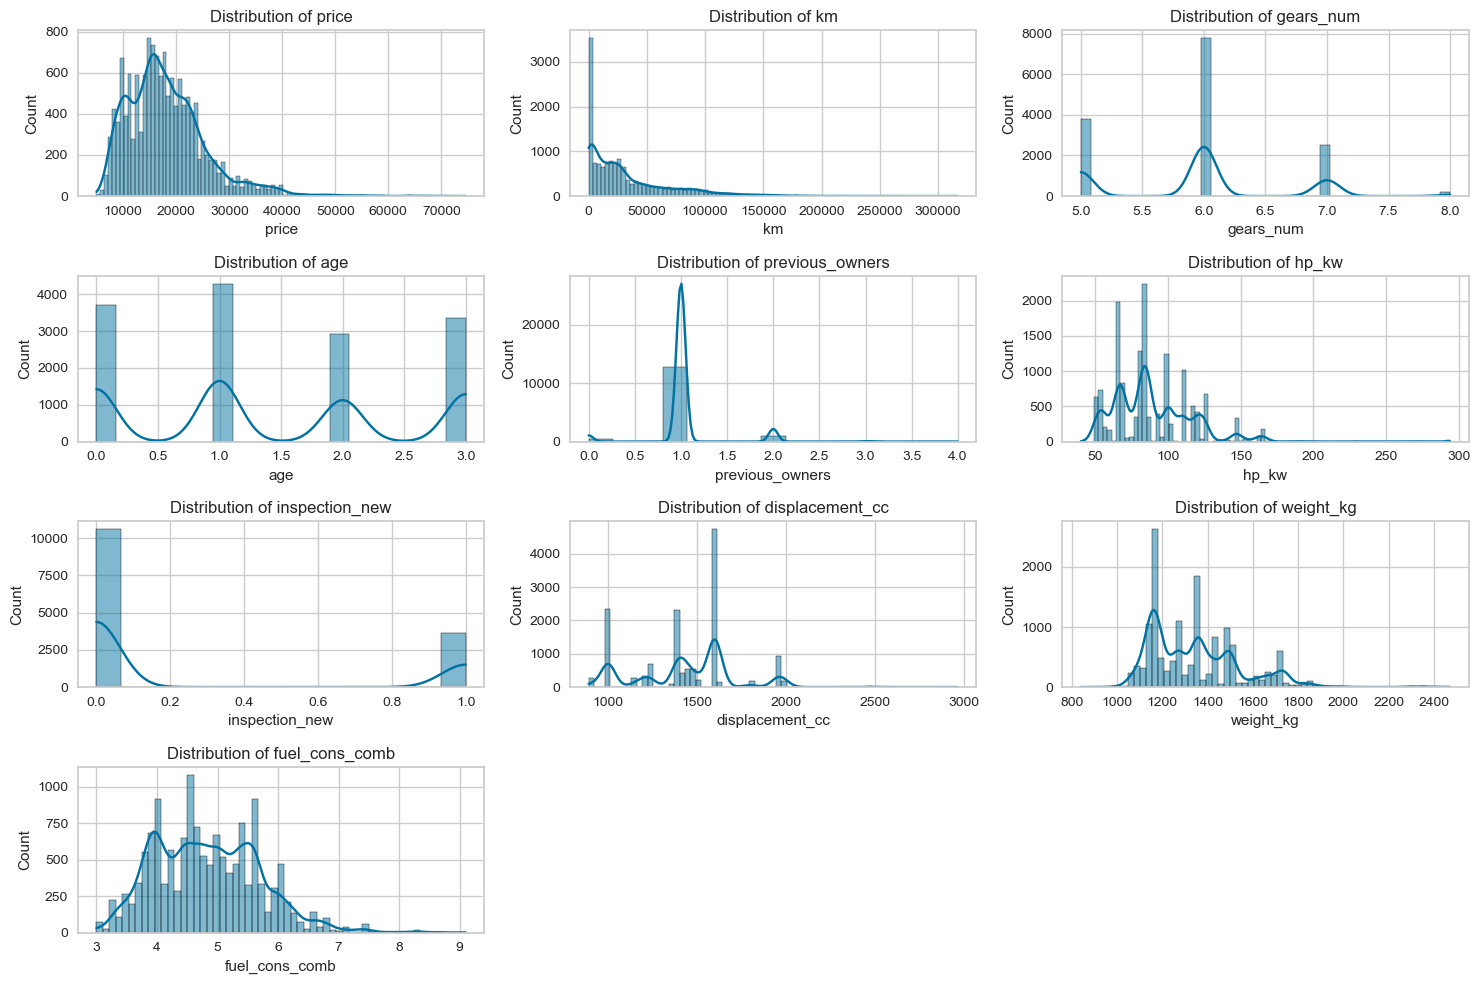

In [31]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

**Distributions of the Numerical Features:**

1. **Price:** Distribution is right-skewed, with most prices concentrated between 10,000 and 20,000 EUR. Some higher-end outliers, particularly above 40,000 EUR.
2. **Km (Mileage):** Distribution is right-skewed, with most vehicles having low mileage. Values above 150,000 km are less common.
3. **Gears Number:** Most vehicles have 5, 6, or 7 gears. Vehicles with 8 gears are rare.
4. **Age:** Peaks at 0, 1, 2, and 3 years, indicating these are common ages for vehicles. Vehicles are generally up to 3 years old.
5. **Previous Owners:** Most vehicles have had one or two previous owners. Vehicles with 3 or more previous owners are less common.
6. **Hp_kw (Engine Power in kW):** Distribution is right-skewed, with most vehicles between 50 and 150 kW. Vehicles above 200 kW are less frequent.
7. **Inspection_new (New Inspection):** Concentration at the extremes (values of 0 and 1). Mid-range values are rare.
8. **Displacement_cc (Engine Displacement in cc):** A peak at 1500 cc. Values above 2000 cc are less common.
9. **Weight_kg:** Most vehicles are between 1000 and 1500 kg. Vehicles above 2000 kg are rare.
10. **Fuel Consumption Combined:** Approximately normal distribution, with most values between 4 and 6 l/100 km. Values above 8 l/100 km are less frequent.

**Overall:**
- **Right-Skewed Distributions:** Many features like `price`, `km`, and `hp_kw` show right-skewed distributions. This skewness might affect the assumptions of linear models, which assume normally distributed residuals.
- **Peaks in Categorical Data:** Features such as `gears_num` and `age` have distinct peaks, indicating specific common values that could be significant predictors in the model.
- **Outliers:** While several features have some higher-end outliers, their impact on linear modeling needs careful assessment to ensure they do not disproportionately influence the model.
- **Data Transformation:** Consider data transformations (e.g., log transformation) to normalize the distributions of skewed features, improving the performance and accuracy of linear models.
- **Feature Scaling:** Ensure all features are appropriately scaled, especially those with wide ranges like `km` and `price`, to ensure effective model training.

By addressing these considerations, linear modeling can be made more robust and accurate with this dataset.

<a id="cat"></a>
## Categorical Features

### Distributions of Categorical Features

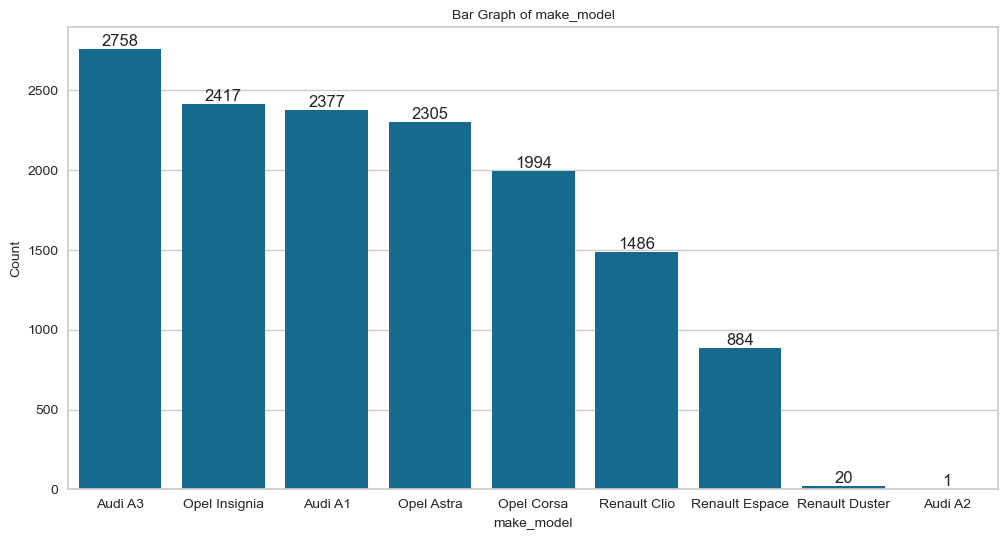

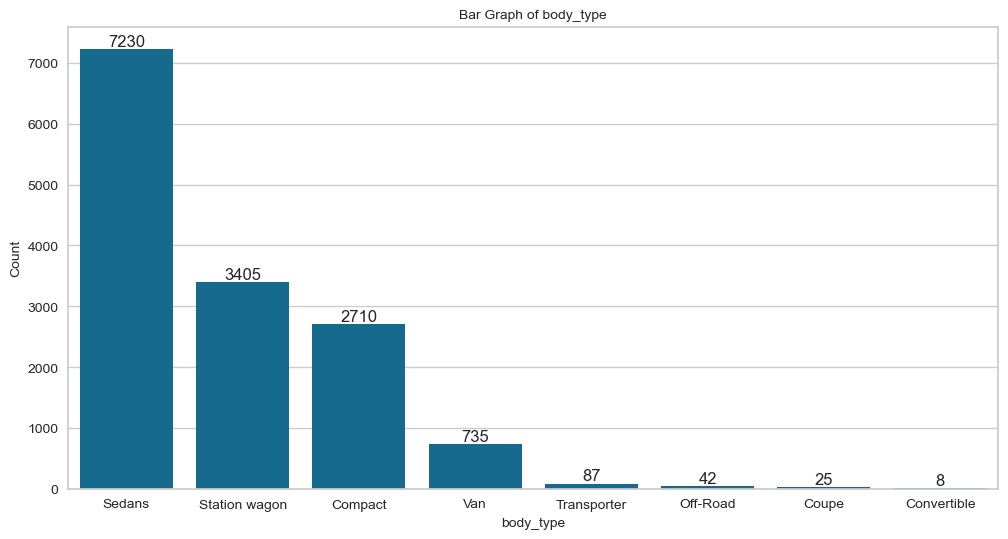

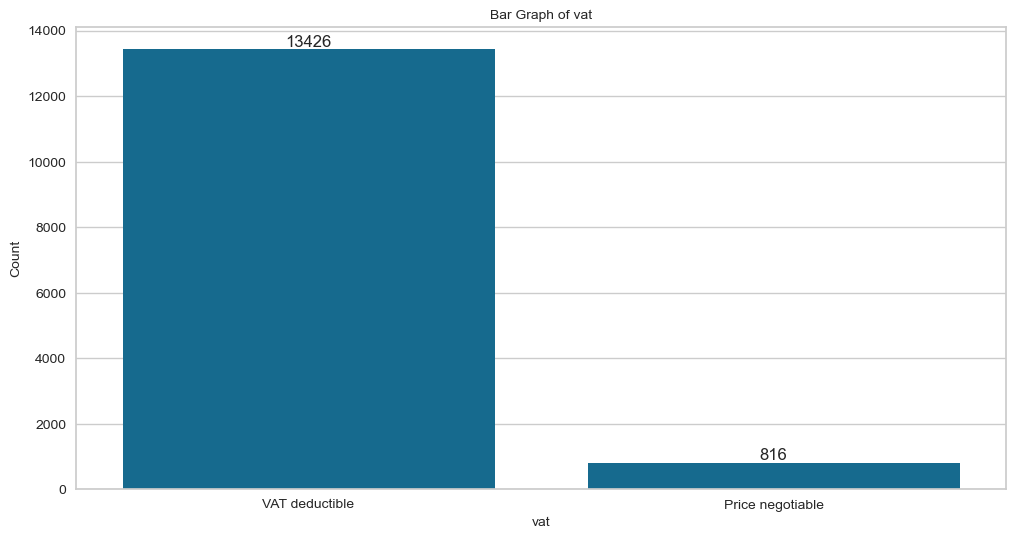

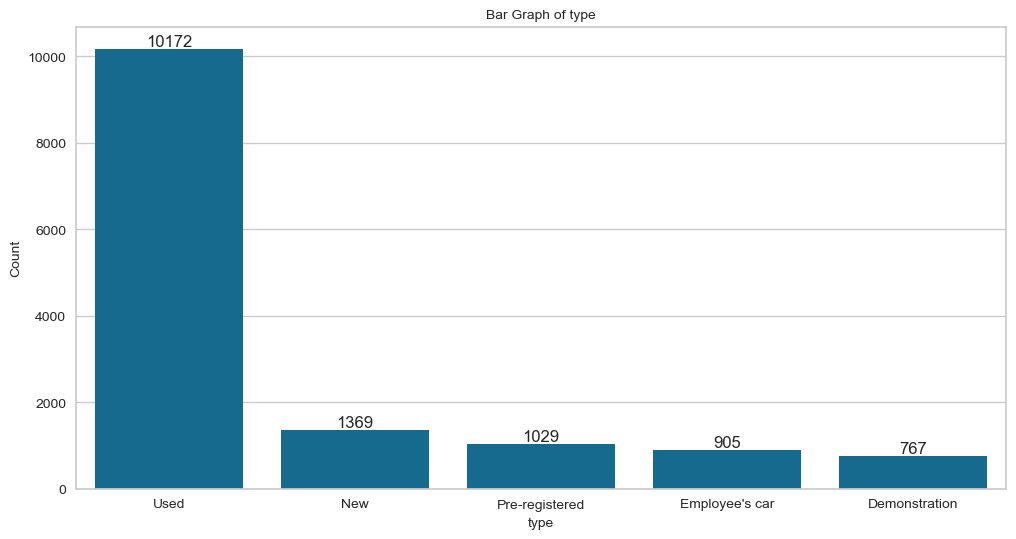

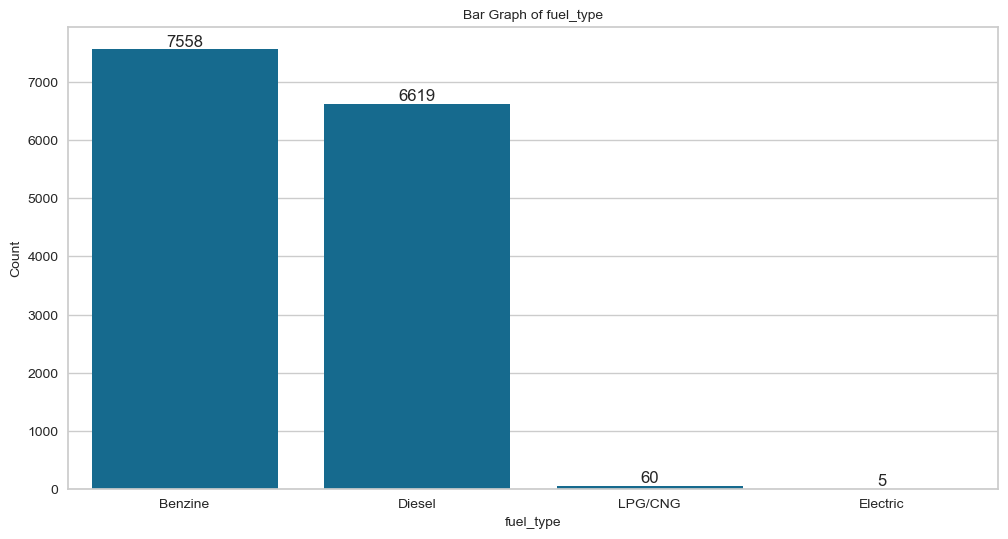

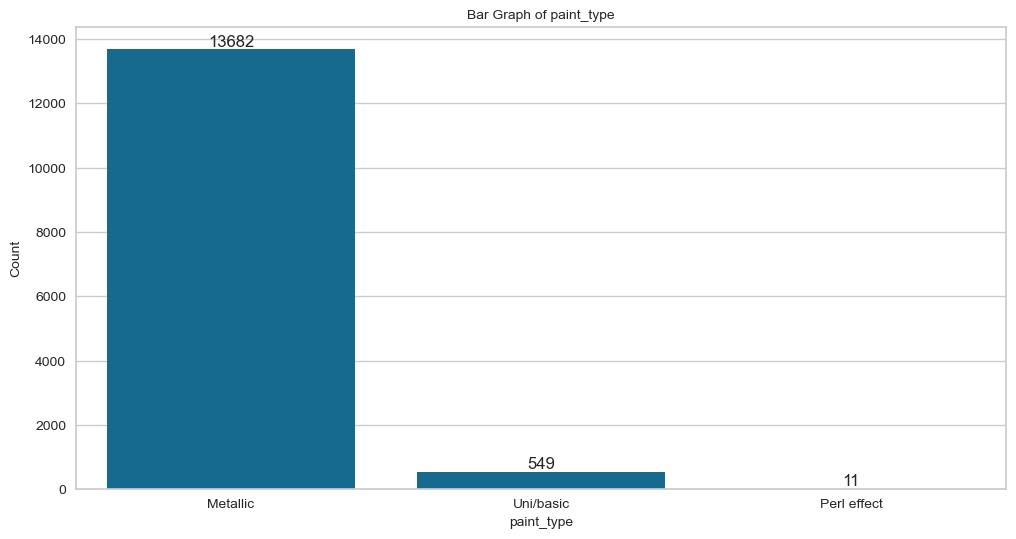

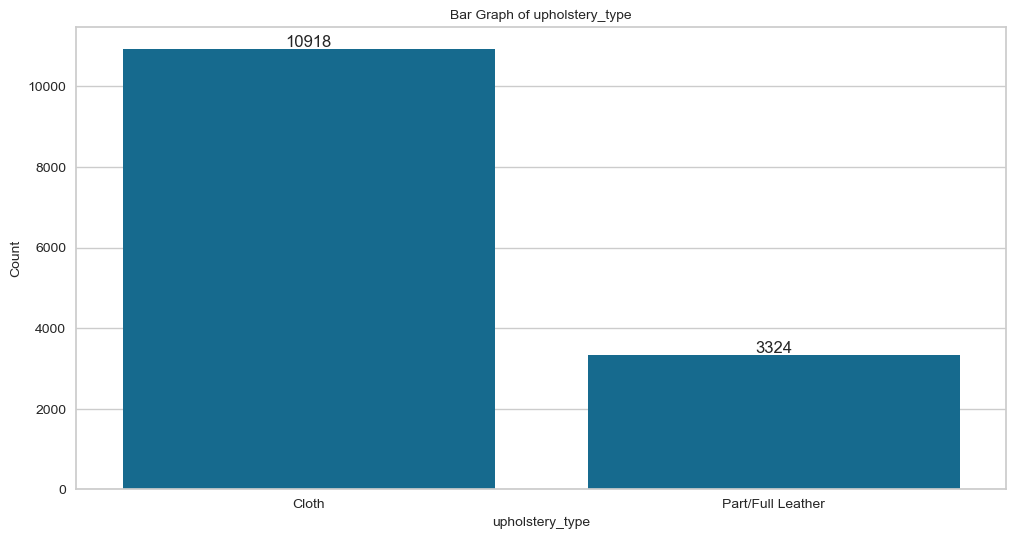

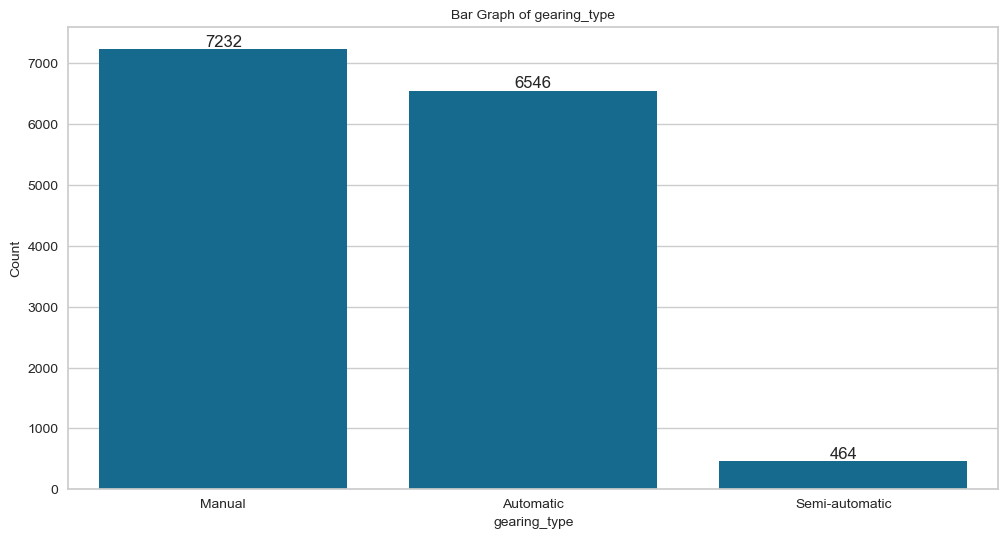

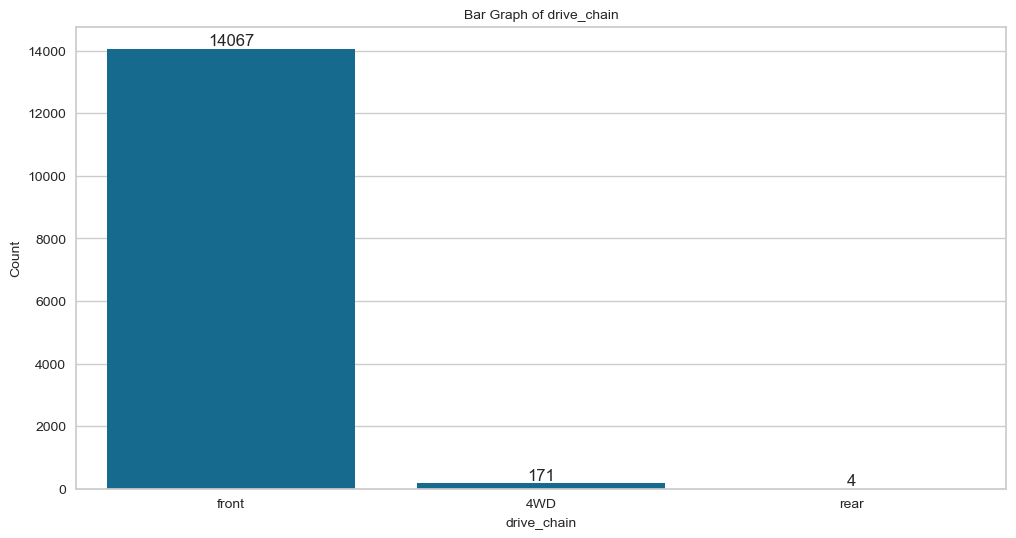

In [35]:
import plotly.graph_objects as go
import plotly.express as px

# Distribution of our categorical characteristics with bar graph


def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(12, 6))
        ax = sns.countplot(x=column,
                           data=df,
                           order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        plt.title(f'Bar Graph of {column}', fontsize=10)
        plt.xticks(ha='center', fontsize=10)
        plt.show()


cat_features = [
    'make_model', 'body_type', 'vat', 'type', 'fuel_type', 'paint_type',
    'upholstery_type', 'gearing_type', 'drive_chain'
]

plot_bar_graphs(df, cat_features)

<a id="corr"></a>
## Correlations

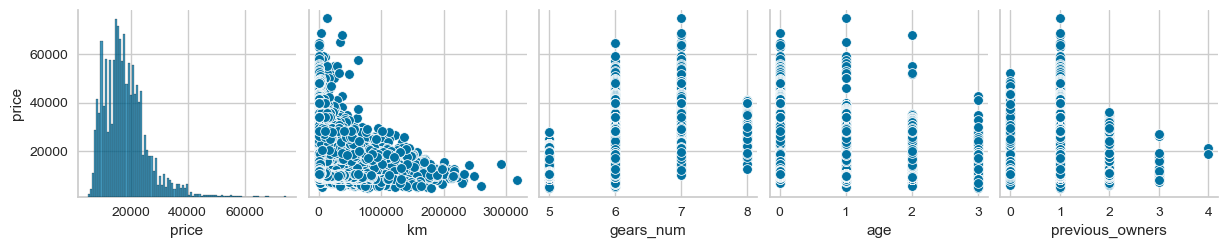

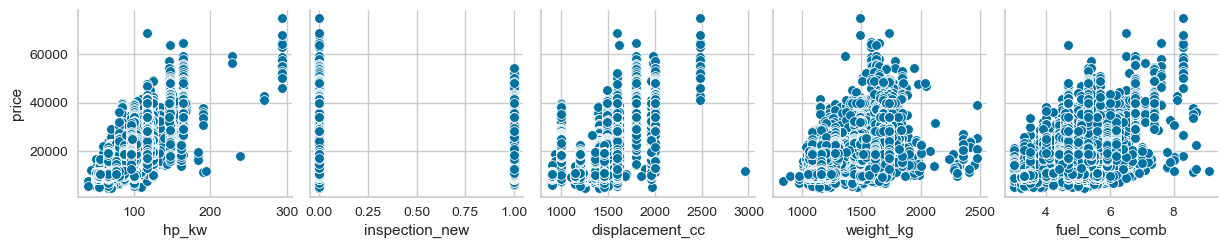

In [37]:
# Target vs Numerical Features

numerical_df = df.select_dtypes(include=['number'])

for i in range(0, len(numerical_df.columns), 5):
    sns.pairplot(data=numerical_df,
                x_vars=numerical_df.columns[i:i+5],
                y_vars=['price'])

### Label Encoding 

In [39]:
# Label the categorical features to see the correlation between categorical features and Target veraible. 

from sklearn.preprocessing import LabelEncoder

# Copy the original dataframe to avoid modifying it directly
df_labeled = df.copy()

# List of categorical columns
categorical_columns = ['make_model', 'body_type', 'vat', 'type', 'fuel_type', 'comfort_convenience',
'entertainment_media', 'extras', 'safety_security', 'paint_type',
'upholstery_type', 'gearing_type', 'drive_chain']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Display the first few rows of the labeled dataframe
df_labeled.head()

,make_model,body_type,price,vat,km,type,fuel_type,gears_num,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,fuel_cons_comb
0,0,4,15770,1,56013.000,4,1,7.000,840,171,244,3124,3.000,2.000,66.000,1,0,0,0,1422.000,1220.000,1,3.800
1,0,4,14500,0,80000.000,4,0,7.000,4695,172,493,2613,2.000,1.000,141.000,0,0,0,0,1798.000,1255.000,1,5.600
2,0,4,14640,1,83450.000,4,1,7.000,5009,320,529,3264,3.000,1.000,85.000,0,0,0,0,1598.000,1135.000,1,3.800
3,0,4,14500,1,73000.000,4,1,6.000,5977,46,504,1487,3.000,1.000,66.000,0,0,0,0,1422.000,1195.000,1,3.800
4,0,4,16790,1,16200.000,4,1,7.000,2407,47,471,3608,3.000,1.000,66.000,1,0,0,0,1422.000,1135.000,1,4.100


In [40]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14242 entries, 0 to 15912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  int32  
 1   body_type            14242 non-null  int32  
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  int32  
 4   km                   14242 non-null  float64
 5   type                 14242 non-null  int32  
 6   fuel_type            14242 non-null  int32  
 7   gears_num            14242 non-null  float64
 8   comfort_convenience  14242 non-null  int32  
 9   entertainment_media  14242 non-null  int32  
 10  extras               14242 non-null  int32  
 11  safety_security      14242 non-null  int32  
 12  age                  14242 non-null  float64
 13  previous_owners      14242 non-null  float64
 14  hp_kw                14242 non-null  float64
 15  inspection_new       14242 non-null  int6

### Heatmap

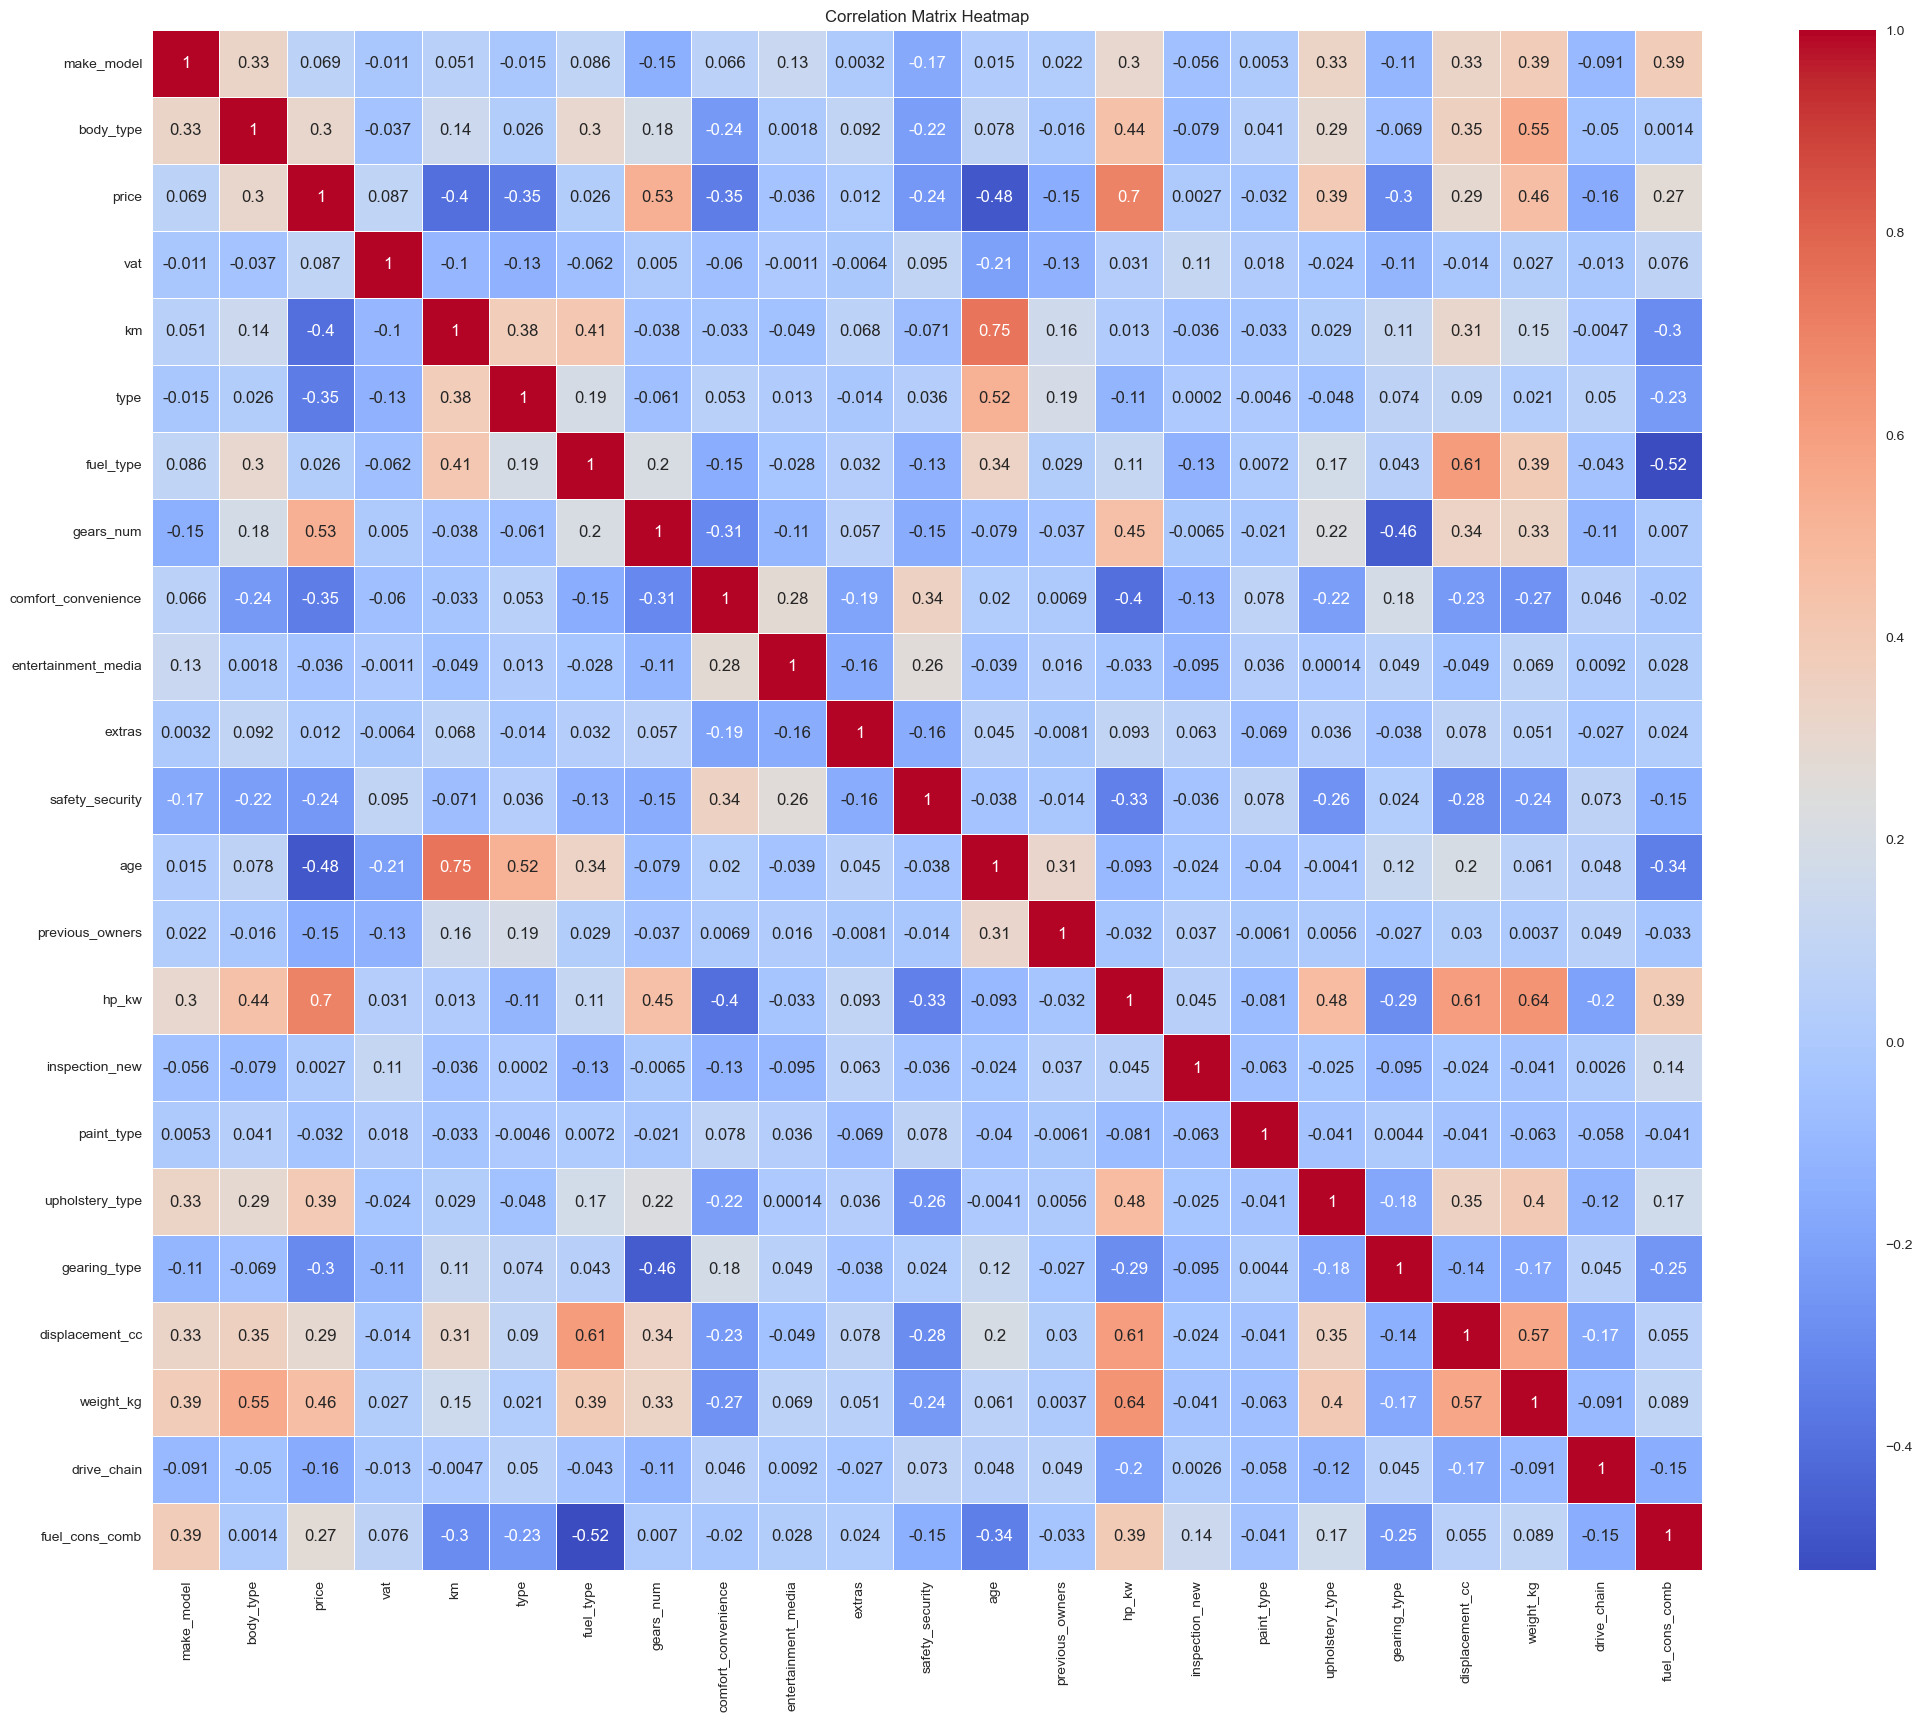

In [42]:
# Corr of all features used Labeled df 

correlation_matrix = df_labeled.corr()

plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [43]:
# Check Multicolinarty between features

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

df_labeled.corr().style.map(color_custom)

,make_model,body_type,price,vat,km,type,fuel_type,gears_num,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,fuel_cons_comb
make_model,1.000000,0.327054,0.069439,-0.011138,0.051404,-0.015027,0.085748,-0.146270,0.065943,0.129709,0.003234,-0.168685,0.014540,0.022334,0.300697,-0.055886,0.005281,0.333009,-0.109929,0.327960,0.387076,-0.091013,0.387220
body_type,0.327054,1.000000,0.304434,-0.036554,0.139391,0.026279,0.298733,0.182115,-0.236887,0.001831,0.091602,-0.215044,0.077671,-0.015783,0.443754,-0.079364,0.041088,0.288684,-0.068857,0.353084,0.549287,-0.050190,0.001373
price,0.069439,0.304434,1.000000,0.087051,-0.402373,-0.350389,0.025583,0.528101,-0.347764,-0.036164,0.012074,-0.244648,-0.481426,-0.148630,0.697984,0.002714,-0.031693,0.394886,-0.299150,0.287056,0.460120,-0.160692,0.273551
vat,-0.011138,-0.036554,0.087051,1.000000,-0.104631,-0.127659,-0.062094,0.005016,-0.060231,-0.001129,-0.006407,0.095352,-0.207585,-0.134057,0.031094,0.111503,0.018431,-0.023963,-0.114237,-0.014385,0.026726,-0.012521,0.076376
km,0.051404,0.139391,-0.402373,-0.104631,1.000000,0.379356,0.413952,-0.038146,-0.033351,-0.049121,0.068500,-0.071110,0.748734,0.158776,0.013366,-0.036464,-0.032642,0.029223,0.114087,0.305729,0.152804,-0.004722,-0.295297
type,-0.015027,0.026279,-0.350389,-0.127659,0.379356,1.000000,0.193455,-0.060956,0.052919,0.013009,-0.014204,0.036312,0.521802,0.190820,-0.114630,0.000203,-0.004602,-0.048139,0.074165,0.090366,0.021155,0.049896,-0.234526
fuel_type,0.085748,0.298733,0.025583,-0.062094,0.413952,0.193455,1.000000,0.204353,-0.151186,-0.028285,0.031707,-0.127852,0.338200,0.028637,0.113218,-0.130849,0.007209,0.174516,0.043201,0.612020,0.387654,-0.042669,-0.522230
gears_num,-0.146270,0.182115,0.528101,0.005016,-0.038146,-0.060956,0.204353,1.000000,-0.307914,-0.106910,0.057241,-0.154906,-0.079298,-0.036680,0.451227,-0.006485,-0.021477,0.224129,-0.463721,0.337763,0.332270,-0.110661,0.006956
comfort_convenience,0.065943,-0.236887,-0.347764,-0.060231,-0.033351,0.052919,-0.151186,-0.307914,1.000000,0.277904,-0.194022,0.344883,0.020332,0.006863,-0.402756,-0.127837,0.078492,-0.215277,0.179809,-0.234556,-0.270643,0.045509,-0.019664
entertainment_media,0.129709,0.001831,-0.036164,-0.001129,-0.049121,0.013009,-0.028285,-0.106910,0.277904,1.000000,-0.157417,0.257983,-0.038928,0.016184,-0.033424,-0.095123,0.036253,0.000138,0.049091,-0.049247,0.068591,0.009168,0.028278


In [44]:
# Corr between Target vs other Features

correlation_matrix = df_labeled.corr() # Labeled df

price_corr = correlation_matrix['price'].sort_values(ascending= False)
price_corr

price                  1.000
hp_kw                  0.698
gears_num              0.528
weight_kg              0.460
upholstery_type        0.395
body_type              0.304
displacement_cc        0.287
fuel_cons_comb         0.274
vat                    0.087
make_model             0.069
fuel_type              0.026
extras                 0.012
inspection_new         0.003
paint_type            -0.032
entertainment_media   -0.036
previous_owners       -0.149
drive_chain           -0.161
safety_security       -0.245
gearing_type          -0.299
comfort_convenience   -0.348
type                  -0.350
km                    -0.402
age                   -0.481
Name: price, dtype: float64

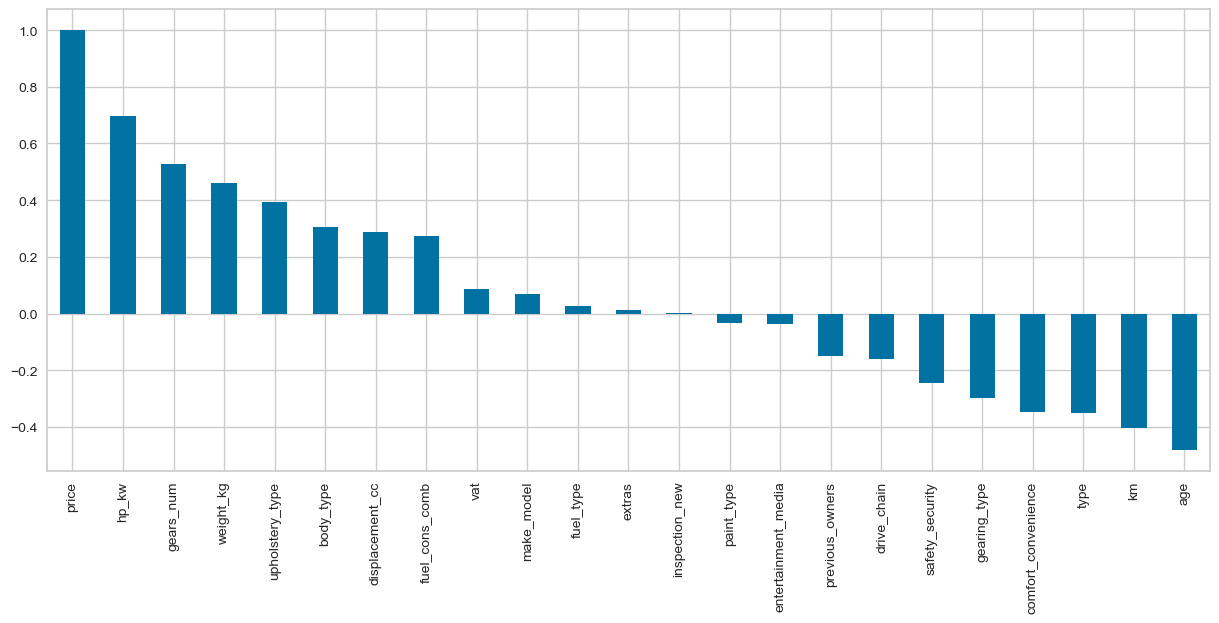

In [45]:
# Target vs other Features

price_corr.plot(kind='bar',figsize=(15,6))
plt.show()

**NOTE:**

1. **Strong Positive Correlations with Price:**
   - **Gears Number (`gears_num`):** Shows a strong positive correlation with `price` (0.53), indicating that cars with more gears tend to be more expensive.
   - **Engine Power (`hp_kW`):** Exhibits a moderate positive correlation with `price` (0.45), suggesting that higher-powered cars are generally more expensive.
   - **Engine Displacement (`displacement_cc`):** Has a moderate positive correlation with `price` (0.36), indicating that cars with larger engine displacements tend to be more expensive.

2. **Negative Correlations with Price:**
   - **Mileage (`km`):** Displays a negative correlation with `price` (-0.35), suggesting that cars with higher mileage tend to be cheaper.
   - **Age (`age`):** Exhibits a negative correlation with `price` (-0.21), indicating that older cars tend to be cheaper.
   - **Fuel Consumption (`fuel_cons_comb`):** Shows a moderate negative correlation with `price` (-0.30), indicating that cars with higher fuel consumption tend to be cheaper.

3. **Multicollinearity Considerations:**
   - **Gears Number (`gears_num`), Engine Power (`hp_kW`), and Engine Displacement (`displacement_cc`):** These features show strong correlations with each other and with `price`, suggesting potential multicollinearity. 
   - **Mileage (`km`) and Age (`age`):** These features also show a strong correlation (0.76) with each other, indicating redundancy. 

Managing multicollinearity among these highly correlated features is crucial to ensure model stability and performance. By addressing these correlations, we can build a more reliable and accurate price prediction model.

<a id="out"></a>
## Outlier Analysis

Linear models are generally sensitive to outliers because they seek linear relationships between data points and employ MSE-like loss functions that amplify large errors. Some models, such as decision trees and robust regression, are more resilient to outliers and are less affected by such data. Therefore, when choosing a model, the characteristics of the dataset and the presence of outliers should be considered.

- However, we will not intervene with outliers at the moment, but we can take action later according to the model's forecasting performance.
- Let's observe the outliers for now.

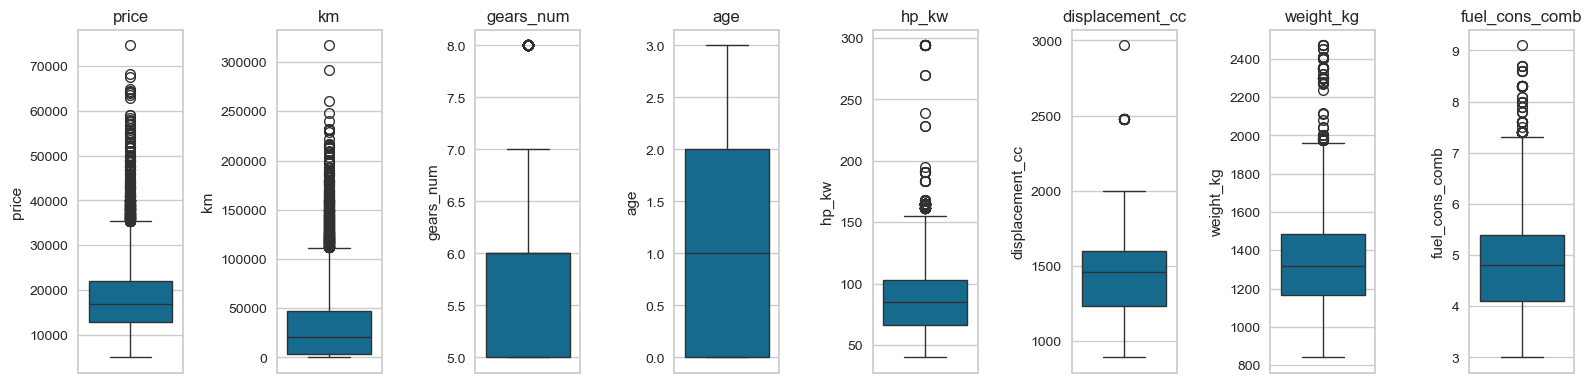

In [49]:
# Checking Outliers

# Initialize the subplot counter
x = 0

#Numerical features;
numerical_columns = ['price', 'km','gears_num','age','hp_kw','displacement_cc','weight_kg','fuel_cons_comb']
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

# Loop through each numerical column and create a boxplot
for col in numerical_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()

In [50]:
# Calculate skewness for numeric features

# A skewness value greater than 1 indicates positive skewness,
# a skewness value less than -1 indicates negative skewness,
# and a skewness value close to zero indicates a relatively symmetric distribution.

num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
km,1.652
hp_kw,1.330
price,1.268
inspection_new,1.117
previous_owners,1.104
weight_kg,1.069


### Target Variable

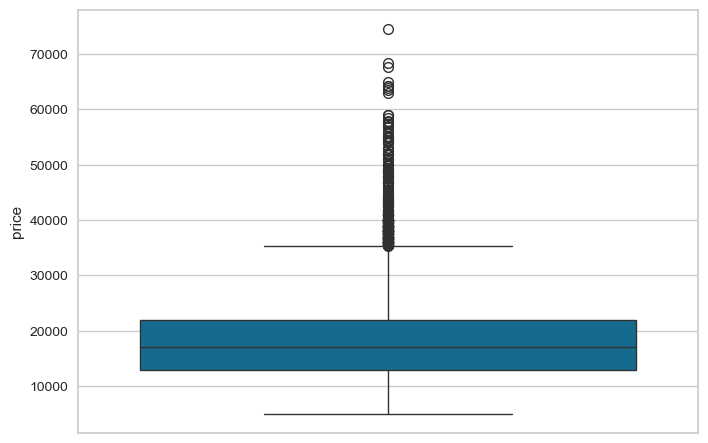

In [52]:
# Checking outliers for target variable 'price' with boxplot

sns.boxplot(df.price);

Skewness: 1.268475


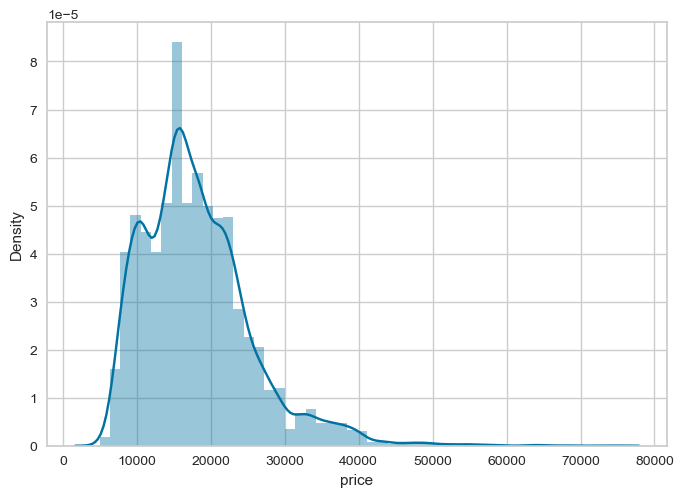

In [53]:
#Skewness of the target variable
print("Skewness: %f" % df['price'].skew())

# Distribution of target variable before log transformation
price_untransformed = sns.distplot(df['price'])

- The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; 
- moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; 
- and highly skewed distribution is < -1.0 and > 1.0. 

*In our case, we have ~1.2, so it is considered skewed data. 
Now, we can try to transform our data, so it looks more normally distributed.*

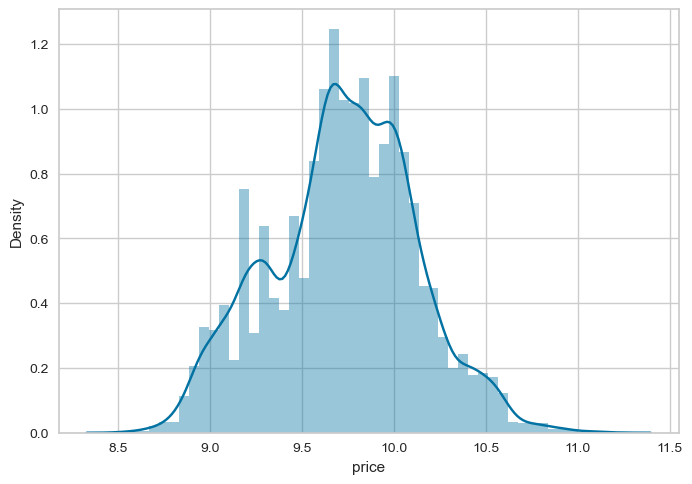

In [55]:
#After Log Transformation
price_transformed = sns.distplot(np.log(df['price']))

###  'Make_model' Feature

- *As we observed in the distributions of the `make_model` feature values above, Audi A2 has only one data point.
    - The fact that the Audi A2 has only one data point indicates that there is not enough data to represent this model.
    - it is insufficient for generalization and should be excluded from the analysis.  
    - By removing Audi A2, we ensure the model's stability and accuracy.

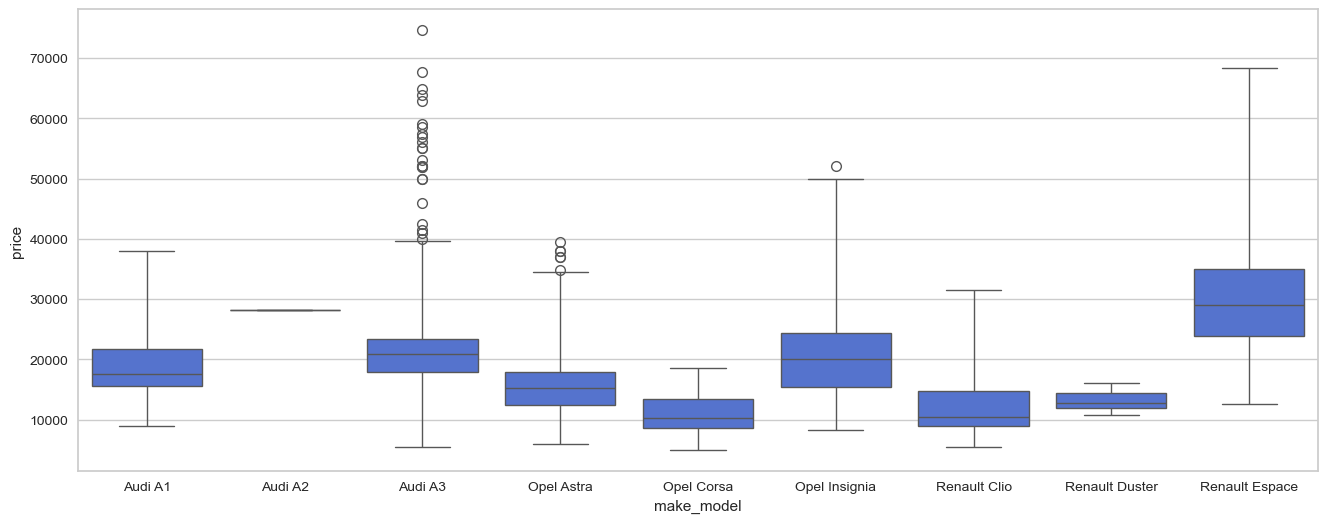

In [57]:
# Make and Models 

plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3, color="royalblue")
plt.show()

In [58]:
# Outlier check for the make_model feature 

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A2         : 0    ,           The rate of outliers : 0.0
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 0.025


- Some models, like Opel Astra, Opel Insignia, and Renault Clio, have a high number of outliers, indicating significant price deviations. 
- Models like Audi A1, Opel Corsa, and Renault Duster have more consistent price distributions with fewer outliers. 
- The overall outlier rate is 2.6%, showing the dataset's sensitivity to outliers. 
- These outliers should be considered in analysis and modeling.

#### Remove the AudiA2 model from the df

In [61]:
models = df.make_model.value_counts()
models

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

In [62]:
# Dropping the only Audi A2 observation to increase model performance

df = df[df['make_model'] != 'Audi A2'] 

In [63]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,type,fuel_type,gears_num,comfort_convenience,entertainment_media,extras,safety_security,age,previous_owners,hp_kw,inspection_new,paint_type,upholstery_type,gearing_type,displacement_cc,weight_kg,drive_chain,fuel_cons_comb


<a id="eng"></a>
# Feature Engineering

### Get Dummies

**Explanation:**

**Original Data:** The `comfort_convenience`, `entertainment_media`, `extras`, and `safety_security` columns contain categorical values.

| comfort_convenience          | entertainment_media       | extras      | safety_security              |
|------------------------------|---------------------------|-------------|------------------------------|
| Air Conditioning, Cruise Control | Bluetooth, CD Player     | Alloy Wheels | ABS, Airbags                 |


**After Get Dummies:**

- Each category has been converted into a separate column. 
- For example, `Air Conditioning` and `Cruise Control` are represented as separate columns with the `cc_` prefix. 
- Similarly, other categories are represented with their own prefixes, with the presence of a category indicated by 1 and its absence by 0.

| cc_Air Conditioning | cc_Cruise Control | em_Bluetooth | em_CD Player | ex_Alloy Wheels | ss_ABS | ss_Airbags |
|---------------------|-------------------|--------------|--------------|----------------|--------|------------|
| 1                   | 1                 | 1            | 1            | 1              | 1      | 1          |


This process allows machine learning models to interpret these categorical features as numerical data, thereby improving model performance.

In [66]:
# Select the categorical features that have more than one value to separate 

selected_columns = df.loc[:, ['comfort_convenience', 'entertainment_media', 'extras', 'safety_security']]
selected_columns.head()

,comfort_convenience,entertainment_media,extras,safety_security
0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."
3,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote..."
4,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect..."


In [67]:
# Get Dummies and separe them

df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [68]:
# Drop the original features we dont need anymore.

df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)

In [69]:
# One-Hot Encoding get_dummies for all df

df = pd.get_dummies(df, drop_first =True)

In [70]:
print(df.shape)

df.head(3)

#new features values are boolean dtype after get_dummies

(14241, 133)


,price,km,gears_num,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,fuel_cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False


In [71]:
# Convert boolean columns(after get_dummy) to integers, changing True to 1 and False to 0.

bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [72]:
print(df.shape)
df.head(3)

(14241, 133)


,price,km,gears_num,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,fuel_cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0


In [73]:
# Check the correlation between target and all features(Including new features after get dummy)
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

age                                        -0.481
gearing_type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
type_Used                                  -0.368
make_model_Renault Clio                    -0.281
drive_chain_front                          -0.159
previous_owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


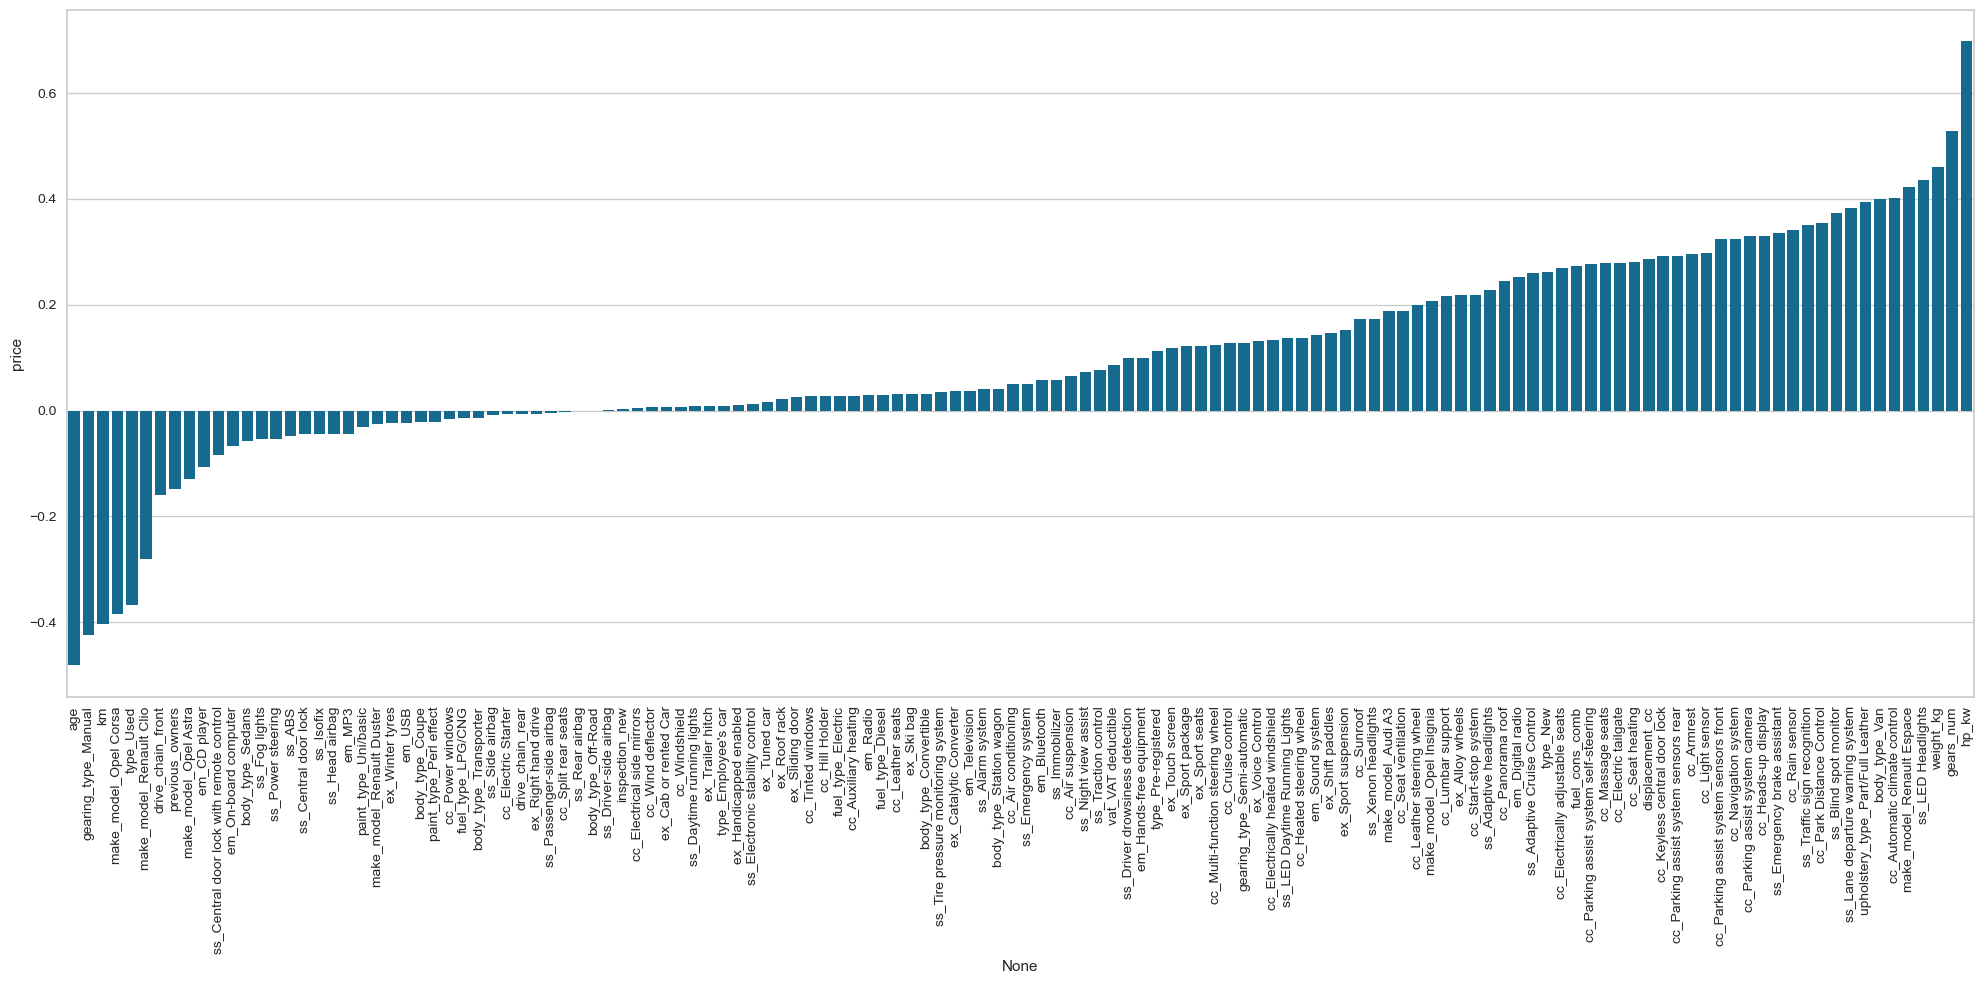

In [74]:
# Plot correlation between target and all features
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

<a id="4.1"></a>
# MACHINE LEARNING MODELLING

### Functions to use to evaluate the model's scores at the end.
#### --> Model Performance Evaluation Function: train_val()

- This function evaluates a model's performance on both the training and test datasets 
- by calculating various metrics such as R², MAE, MSE, and RMSE.

In [77]:
def train_val(model, X_train, y_train, X_test, y_test, i):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    i+"_train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

#### --> Adjusted R² : adj_r2()

- R² Score: Indicates how much of the variance in the dependent variable is explained by the model.
- Adjusted R² Score: Adjusts the explanatory power of the model based on the number of independent variables, reducing the risk of overfitting.

In [79]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       
    n = df.shape[0]                     
    p = df.shape[1]-1                   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

<a id="5."></a>
## Split the Data

In [81]:
# Split Target and Independent Features

X= df.drop(columns="price")
y= df.price

In [82]:
# Train-test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X.shape

(14241, 132)

<a id="6."></a>
#  Linear Regression
- Started with a simple, basic model without any special optimizations, manipulations,scaling or outlier handling on the dataset, which in machine learning and data science is referred to as a "vanilla model."
- By observing the performance of this initial model, we can compare it with more complex and optimized models in the end if we need.


### Model

In [85]:
#Set and fit the model 

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [87]:
# Prediction
y_pred = linear_model.predict(X_test)

# Calculation of the metrics of the test data to compare models at the end.
lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(lm_R2)
print(lm_mae)
print(lm_rmse)

0.883935208075303
1725.5088166161338
2501.8602245902525


### Evaluating the Linear Model

In [89]:
# Check the coefficients to see how it affects top-10 feature importance

lm1_coef = pd.DataFrame(linear_model.coef_, index = X.columns, columns=["lm1_Coeff"]).sort_values("lm1_Coeff")
lm1_coef.head(10)

,lm1_Coeff
make_model_Renault Duster,-10291.130
make_model_Renault Clio,-5255.546
make_model_Opel Corsa,-5086.767
drive_chain_rear,-3802.868
make_model_Opel Astra,-3786.396
type_Employee's car,-2982.985
type_Used,-2824.140
drive_chain_front,-2384.019
type_Pre-registered,-2191.709
age,-1588.903


In [90]:
# Performance metrics

lm_score = train_val(linear_model, X_train, y_train, X_test, y_test, 'linear')
lm_score

# The model shows a high R² score on the training data (0.89) and R² score on the test data (0.88),indicating potential overfitting.
# The difference between MAE and RMSE indicates outlier effect.

,linear_train,linear_test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [91]:
# Normalized RMSE 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmse:', rmse)

#Average error rate;
print('avg_error', rmse/df.price.mean())

rmse: 2501.8602245902525
avg_error 0.1382223339590956


In [92]:
# Adjusted R² 

adj_r2(y_test, y_pred, df)

# Additionally, the Adjusted R² score (0.882) for the test data confirms that while the model explains a large portion of the variance, 
# the inclusion of more features may not significantly improve the model's performance.

0.8828492602064301

**NOTE:**

- Initial linear regression model was built using the provided dataset without any data manipulation. 
- The model explains 88.2% of the variance in the target variable, indicating a strong fit but with some room for improvement.

## Remove Outliers 

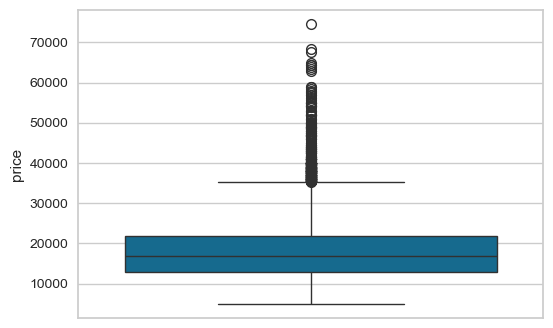

In [95]:
# Checking outliers for target variable 'price' with boxplot

plt.figure(figsize =(6,4))
sns.boxplot(df.price);

In [96]:
len(df[df.price > 35000])

473

In [97]:
# Excluding rows where the price is greater than 35,000 using new df1

df1 = df[~(df.price > 35000)]

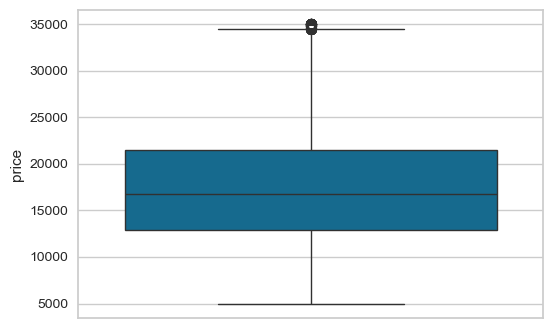

In [98]:
plt.figure(figsize = (6,4))
sns.boxplot(df1.price);

### Linear Model Without Outliers

In [100]:
#Split the data for df1 

X = df1.drop(columns = "price")
y = df1.price

#Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [101]:
#Set and fit the model2

linear_model2 = LinearRegression()

linear_model2.fit(X_train, y_train)

LinearRegression()

In [102]:
# Check the coefficients to see how it affects feature importance

lm2_coef = pd.DataFrame(linear_model2.coef_, index = X.columns, columns=["lm2_Coeff"]).sort_values("lm2_Coeff")
lm2_coef.head(10)

,lm2_Coeff
make_model_Renault Duster,-9447.389
make_model_Renault Clio,-5424.873
make_model_Opel Corsa,-5245.299
make_model_Opel Astra,-3372.469
drive_chain_rear,-2859.199
type_Employee's car,-2090.024
type_Used,-1975.265
ex_Sliding door,-1618.279
gearing_type_Manual,-1581.537
age,-1445.872


In [103]:
# Prediction2

y_pred = linear_model2.predict(X_test)

# Calculation of the metrics of the test data to compare models at the end.
lm2_R2 = r2_score(y_test, y_pred)
lm2_mae = mean_absolute_error(y_test, y_pred)
lm2_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score:", lm2_R2)
print(f"Mean Absolute Error:", lm2_mae)
print(f"Root Mean Sqaured Error:", lm2_rmse)

R2 Score: 0.8955794125789905
Mean Absolute Error: 1415.381311763395
Root Mean Sqaured Error: 1959.6494206641905


### Evaluating the Model

In [105]:
# Performance Metrics

lm2_score = train_val(linear_model2, X_train, y_train, X_test, y_test, 'linear2_out')
lm2_score

,linear2_out_train,linear2_out_test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


In [106]:
# Comparing the metric scores with Initial Linear Reg Model

results = pd.concat([lm_score, lm2_score], axis=1)
results

,linear_train,linear_test,linear2_out_train,linear2_out_test
R2,0.890,0.884,0.898,0.896
mae,1718.455,1725.509,1414.209,1415.381
mse,6088991.592,6259304.583,3792751.061,3840225.852
rmse,2467.588,2501.860,1947.499,1959.649


In [107]:
# Normalized RMSE of linear model without outliers on target 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('rmse:', rmse)

#Average error rate;
print('avg_error', rmse/df1.price.mean())

rmse: 1959.6494206641905
avg_error 0.1131662326094706


- Before removing the outliers, our average prediction error was 13.81%. 
- After excluding the outliers, it decreased to 11.31%. 
- This represents an improvement of approximately 2.50% in our predictions.

# Scale Data

- In this section, we will rebuild the models using data scaled with MinMaxScaler. 
- Scaling the data helps to normalize the feature ranges, which can improve the performance and convergence speed of the models

In [110]:
#Split

X = df.drop(columns="price")
y = df.price

In [111]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
#Scale -fit - transform

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regularization

<a id="7."></a>
## Ridge Regression

**GridSearchCV for Ridge Model**

In [115]:
from sklearn.model_selection import GridSearchCV

# Set the model
ridge = Ridge(random_state=42) 



# Set the GridSearchCV and params
alpha_space = np.linspace(0.01, 100, 100)

param_grid = {"alpha":alpha_space}

ridge_model = GridSearchCV(estimator=ridge,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [116]:
# Fit the Model
ridge_model.fit(X_train_scaled,y_train) 

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [117]:
ridge_model.best_params_

{'alpha': 1.02}

In [118]:
# We obtained the best parameters for the Ridge model with alpha=1.02 after performing GridSearchCV.

# Set the Ridge model again with best alpha value;
ridge_model_alpha = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

# Check the coefficients to see how it affects feature importance
ridge_coef = pd.DataFrame(ridge_model_alpha.coef_, index = X.columns, columns=["ridge_Coef"]).sort_values("ridge_Coef")
ridge_coef.head(10)

,ridge_Coef
km,-11817.904
make_model_Renault Duster,-9203.373
make_model_Renault Clio,-5251.673
make_model_Opel Corsa,-5205.966
age,-4820.489
make_model_Opel Astra,-3740.368
drive_chain_rear,-2987.850
type_Employee's car,-2968.042
type_Used,-2813.387
drive_chain_front,-2334.704


In [119]:
# Comparing the coefficients of the Ridge and initial linear regression models to assess feature importance

pd.concat([lm1_coef, ridge_coef], axis=1).head(10)

,lm1_Coeff,ridge_Coef
make_model_Renault Duster,-10291.130,-9203.373
make_model_Renault Clio,-5255.546,-5251.673
make_model_Opel Corsa,-5086.767,-5205.966
drive_chain_rear,-3802.868,-2987.850
make_model_Opel Astra,-3786.396,-3740.368
type_Employee's car,-2982.985,-2968.042
type_Used,-2824.140,-2813.387
drive_chain_front,-2384.019,-2334.704
type_Pre-registered,-2191.709,-2169.132
age,-1588.903,-4820.489


### - Prediction

In [121]:
# Prediction
y_pred = ridge_model.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
ridge_R2 = r2_score(y_test, y_pred)
ridge_mae = mean_absolute_error(y_test, y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(ridge_R2)
print(ridge_mae)
print(ridge_rmse)

0.8841789579307733
1722.8854868936262
2499.23174194477


### - Evaluating the Model

In [123]:
# Model evaluation metrics scores

ridge_scores = train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test, 'ridge')
ridge_scores

,ridge_train,ridge_test
R2,0.890,0.884
mae,1716.690,1722.885
mse,6094440.410,6246159.300
rmse,2468.692,2499.232


In [124]:
# Comparing the metric scores of earlier Models vs Grid Ridge Model

result = pd.concat([results, ridge_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test
R2,0.890,0.884,0.898,0.896,0.890,0.884
mae,1718.455,1725.509,1414.209,1415.381,1716.690,1722.885
mse,6088991.592,6259304.583,3792751.061,3840225.852,6094440.410,6246159.300
rmse,2467.588,2501.860,1947.499,1959.649,2468.692,2499.232


<a id="8."></a>
## Lasso Regression

**GridSearchCV for Lasso Model**

In [126]:
# Set the model
lasso = Lasso(random_state=42) 



# Set the GridSearchCV and params
alpha_space = np.linspace(0.01, 100, 100)

param_grid = {"alpha":alpha_space}

lasso_model = GridSearchCV(estimator=lasso,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [127]:
# Fit the Model
lasso_model.fit(X_train_scaled,y_train) 

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [128]:
lasso_model.best_params_

{'alpha': 1.02}

In [129]:
# We obtained the best parameters for the Lasso model with alpha=1.02 after performing GridSearchCV.

# Set the Lasso model again with best alpha params;
lasso_model_alpha = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

# Check the coefficients to see how it affects feature importance
lasso_coef = pd.DataFrame(lasso_model_alpha.coef_, index = X.columns, columns=["lasso_Coef"]).sort_values("lasso_Coef")
lasso_coef.head(10)

,lasso_Coef
km,-11876.922
make_model_Renault Duster,-9094.844
make_model_Renault Clio,-5185.972
make_model_Opel Corsa,-5114.657
age,-4817.747
make_model_Opel Astra,-3749.536
type_Employee's car,-2890.334
type_Used,-2751.131
drive_chain_front,-2142.016
type_Pre-registered,-2080.564


In [130]:
pd.concat([ridge_coef, lasso_coef], axis=1).head(10)

# Comparing the coefficients of the Ridge and Lasso regression models, 
# to understand how each regularization technique affects feature importance

,ridge_Coef,lasso_Coef
km,-11817.904,-11876.922
make_model_Renault Duster,-9203.373,-9094.844
make_model_Renault Clio,-5251.673,-5185.972
make_model_Opel Corsa,-5205.966,-5114.657
age,-4820.489,-4817.747
make_model_Opel Astra,-3740.368,-3749.536
drive_chain_rear,-2987.850,-647.723
type_Employee's car,-2968.042,-2890.334
type_Used,-2813.387,-2751.131
drive_chain_front,-2334.704,-2142.016


### - Prediction

In [132]:
# Prediction
y_pred = lasso_model.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
lasso_R2 = r2_score(y_test, y_pred)
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(lasso_R2)
print(lasso_mae)
print(lasso_rmse)

0.8845643139633643
1721.927898452896
2495.0705962639568


### - Evaluating the Lasso Model

In [134]:
# Model evaluation metrics scores

lasso_scores = train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test, 'lasso')
lasso_scores

,lasso_train,lasso_test
R2,0.890,0.885
mae,1719.602,1721.928
mse,6107178.086,6225377.280
rmse,2471.271,2495.071


In [135]:
# Comparing the metric scores of Grid Ridge and Grid Lasso models to evaluate their performance, and 
# to assess how each regularization technique affects the model's predictive accuracy and error metrics.

result = pd.concat([result, lasso_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test
R2,0.890,0.884,0.898,0.896,0.890,0.884,0.890,0.885
mae,1718.455,1725.509,1414.209,1415.381,1716.690,1722.885,1719.602,1721.928
mse,6088991.592,6259304.583,3792751.061,3840225.852,6094440.410,6246159.300,6107178.086,6225377.280
rmse,2467.588,2501.860,1947.499,1959.649,2468.692,2499.232,2471.271,2495.071


- The comparison of metric scores indicates that both Grid Ridge and Grid Lasso models perform similarly, 
- with Lasso slightly outperforming Ridge in test set R² and RMSE, 
- suggesting marginally better generalization for the Lasso model.

<a id="9."></a>
## Elastic-Net Regression

**GridSearchCV for ElasticNet Model**

In [138]:
# Set the model
elastic = ElasticNet(random_state=42)



# Set the GridSearchCV and params for ElasticNet (alpha and l1_ratio)
param_grid = {
    'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
    'l1_ratio': [.5, .7, .9, .95, .99, 1]
}

elastic_model = GridSearchCV(estimator=elastic,
                                  param_grid=param_grid,
                                  scoring='neg_root_mean_squared_error',
                                  cv=10,
                                  n_jobs=-1)

alpha:

- This parameter controls the overall regularization strength.
- When alpha = 0, ElasticNet performs no regularization.
= As the alpha value increases, the strength of regularization increases, which can help the model become more resistant to overfitting.

l1_ratio:
- This parameter controls the mixture between L1 (Lasso) and L2 (Ridge) regularization.
- When l1_ratio = 1, it means this is entirely L1 (i.e., only Lasso).
- When l1_ratio = 0, it means this is entirely L2 (i.e., only Ridge).
- When 0 < l1_ratio < 1, you get a combination of both L1 and L2 regularizations.
- For example, if l1_ratio = 0.5, it means L1 and L2 regularizations are used equally.

In [140]:
# Fit the Model
elastic_model.fit(X_train_scaled,y_train) 

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [141]:
elastic_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [142]:
# Prediction
y_pred = elastic_model.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(em_R2)
print(em_mae)
print(em_rmse)

0.8845643139633643
1721.927898452896
2495.0705962639568


In [143]:
# Model evaluation metrics scores

elastic_scores = train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test, 'elastic')
elastic_scores

,elastic_train,elastic_test
R2,0.890,0.885
mae,1719.602,1721.928
mse,6107178.086,6225377.280
rmse,2471.271,2495.071


In [144]:
# Comparing the metric scores of models to evaluate their performance, and 
# to assess how each regularization technique affects the model's predictive accuracy and error metrics.

result = pd.concat([result, elastic_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
R2,0.890,0.884,0.898,0.896,0.890,0.884,0.890,0.885,0.890,0.885
mae,1718.455,1725.509,1414.209,1415.381,1716.690,1722.885,1719.602,1721.928,1719.602,1721.928
mse,6088991.592,6259304.583,3792751.061,3840225.852,6094440.410,6246159.300,6107178.086,6225377.280,6107178.086,6225377.280
rmse,2467.588,2501.860,1947.499,1959.649,2468.692,2499.232,2471.271,2495.071,2471.271,2495.071


**Comparing all Models**

- The linear2_out model, where outliers were excluded from the target feature, showed the best performance with the highest R² scores and the lowest MAE, MSE, and RMSE, But Considering Overfitting.
- Ridge, Lasso, and Elastic Net regressions with scale had similar performance, not significantly better than the second linear model.
- By combining the benefits of outlier removal and Lasso regularization, could achieve a more accurate and interpretable model.

<br>

**--> Let's try to see the combined model: Lasso Model without Outliers**

## Lasso2 (alpha=1.02) Model without Outliers

In [147]:
# Excluding rows where the price is greater than 35,000 using df_final
print(len(df[df.price > 35000]))

df2 = df[~(df.price > 35000)]

473


In [148]:
#Split the data

X = df2.drop(columns = "price")
y = df2.price

In [149]:
# Split train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [150]:
#Scale -fit - transform - X

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### - Model

In [152]:
# Set the model
lasso2 = Lasso(alpha=1.02, random_state=42) 

In [153]:
# Fit the Model
lasso2.fit(X_train_scaled,y_train) 

Lasso(alpha=1.02, random_state=42)

### - Prediction

In [155]:
# Prediction
y_pred = lasso2.predict(X_test_scaled)

# Calculation of the metrics of the test data to compare models at the end.
lasso2_R2 = r2_score(y_test, y_pred)
lasso2_mae = mean_absolute_error(y_test, y_pred)
lasso2_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(lasso2_R2)
print(lasso2_mae)
print(lasso2_rmse)

0.8962714979555529
1408.9561317098285
1953.144480067058


### - Evaluating the Lasso Model

In [157]:
# Model evaluation metrics scores

lasso2_scores = train_val(lasso2, X_train_scaled, y_train, X_test_scaled, y_test, 'lasso2')
lasso2_scores

,lasso2_train,lasso2_test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [158]:
# Comparing the metric scores of Grid Ridge and Grid Lasso models to evaluate their performance, and 
# to assess how each regularization technique affects the model's predictive accuracy and error metrics.

result = pd.concat([result, lasso2_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test,lasso2_train,lasso2_test
R2,0.890,0.884,0.898,0.896,0.890,0.884,0.890,0.885,0.890,0.885,0.898,0.896
mae,1718.455,1725.509,1414.209,1415.381,1716.690,1722.885,1719.602,1721.928,1719.602,1721.928,1414.186,1408.956
mse,6088991.592,6259304.583,3792751.061,3840225.852,6094440.410,6246159.300,6107178.086,6225377.280,6107178.086,6225377.280,3806891.515,3814773.360
rmse,2467.588,2501.860,1947.499,1959.649,2468.692,2499.232,2471.271,2495.071,2471.271,2495.071,1951.126,1953.144


**Comparing Models:**
- The Ridge model, while scaled, does not outperform the Linear2 and Final Lasso models, indicating that the additional complexity does not provide a significant benefit in this case.

Recommendation for the Final Model: 
- The Lasso2 model is recommended as it combines the benefits of regularization through Lasso, data scaling, and outlier removal, leading to robust performance and minimal overfitting.

<a id="10."></a>
# Feature Importance

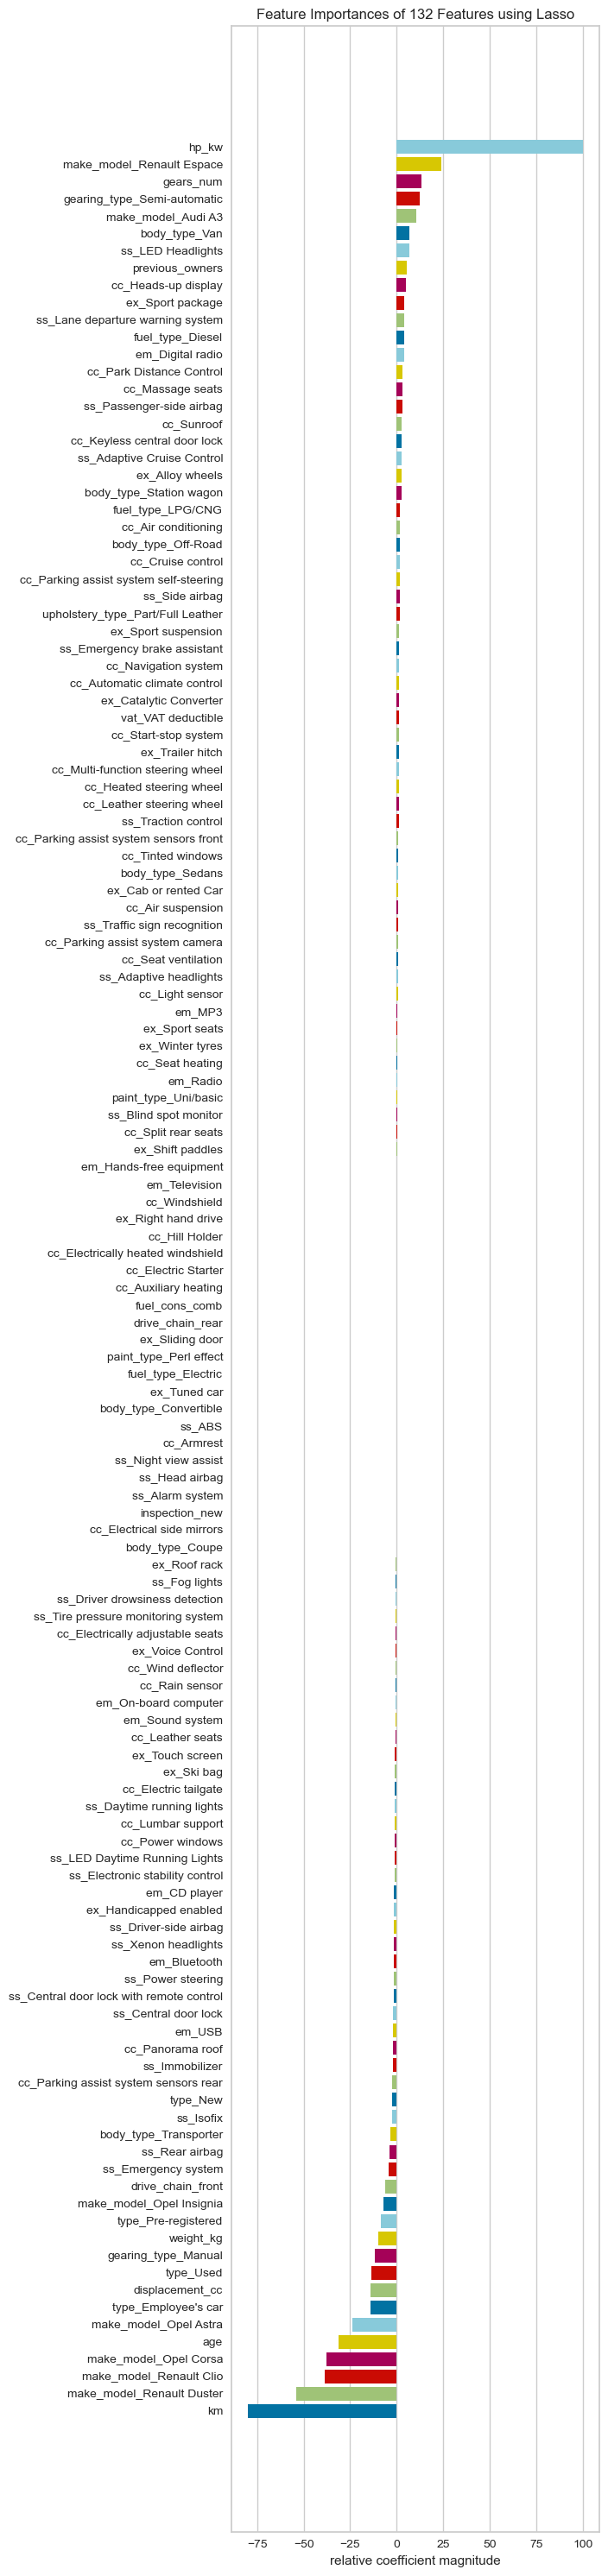

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [161]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns) # Lasso Model is selected here
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

# We will use Lasso for the Final model

## Lasso3 Model with Selected Features

In [163]:
# Create new df with the selected features

df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

# Selecting the top 5 features with the most impact on prediction.
# You might wonder why the make_model feature was chosen. When examining the visualization above,
# it was observed that among the features with the most impact on prediction, the make_model feature includes unique categorical observations (such as Audi A3, Audi A1, Renault Espace, etc.).

In [164]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [165]:
df_new.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [166]:
df_new = df_new[df_new['make_model'] != 'Audi A2']  # Excluding data has only 1 value

In [167]:
df_new = df_new[~(df_new.price > 35000)] # Excluding the Outliers from target feature

In [168]:
df_new = pd.get_dummies(df_new) # Get Dummies for the final dataset

print(len(df_new))
df_new.head(3)

# After get dummy, features have boolean dtype. 

15419


,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,True,False,False


### Split and Scale for df_new

In [170]:
X = df_new.drop(columns=["price"])
y = df_new.price

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [172]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model

In [174]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso3 = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)

In [175]:
lasso3.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [176]:
lasso3.best_params_

{'alpha': 0.01}

In [177]:
lasso3.best_score_ # best score of the test data

-2239.588352950935

In [178]:
#Prediction
y_pred = lasso3.predict(X_test_scaled)

lasso3_R2 = r2_score(y_test, y_pred)
lasso3_mae = mean_absolute_error(y_test, y_pred)
lasso3_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [179]:
# Model evaluation metrics scores

lasso3_scores = train_val(lasso3, X_train_scaled, y_train, X_test_scaled, y_test, 'lasso3')
lasso3_scores

,lasso3_train,lasso3_test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [180]:
result = pd.concat([result, lasso3_scores], axis=1)
result

,linear_train,linear_test,linear2_out_train,linear2_out_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test,lasso2_train,lasso2_test,lasso3_train,lasso3_test
R2,0.890,0.884,0.898,0.896,0.890,0.884,0.890,0.885,0.890,0.885,0.898,0.896,0.867,0.877
mae,1718.455,1725.509,1414.209,1415.381,1716.690,1722.885,1719.602,1721.928,1719.602,1721.928,1414.186,1408.956,1611.742,1553.998
mse,6088991.592,6259304.583,3792751.061,3840225.852,6094440.410,6246159.300,6107178.086,6225377.280,6107178.086,6225377.280,3806891.515,3814773.360,5007030.903,4547724.302
rmse,2467.588,2501.860,1947.499,1959.649,2468.692,2499.232,2471.271,2495.071,2471.271,2495.071,1951.126,1953.144,2237.640,2132.539


- The Lasso3 model, which included only the selected features `["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]`, demonstrated slightly lower performance with R² scores of 0.867 (train) and 0.877 (test), but it still maintained a reasonable prediction accuracy. 

**- Overall, the lasso2 model, where outlier excluded with Lasso regularization on the original df, provides the best balance of accuracy and robustness, indicating that removing outliers and focusing on relevant features significantly improves model performance.**

# Compare Models Performance

In [183]:
scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "linear2_m": {
        "r2_score": lm2_R2,
        "mae": lm2_mae,
        "rmse": lm2_rmse
    },
    "ridge_m": {
        "r2_score": ridge_R2,
        "mae": ridge_mae,
        "rmse": ridge_rmse
    },
    "lasso_m": {
        "r2_score": lasso_R2,
        "mae": lasso_mae,
        "rmse": lasso_rmse
    },
     "lasso2_m": {
        "r2_score": lasso2_R2,
        "mae": lasso2_mae,
        "rmse": lasso2_rmse
    },
    "lasso3_m": {
        "r2_score": lasso3_R2,
        "mae": lasso3_mae,
        "rmse": lasso3_rmse
    }
}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.884,1725.509,2501.860
linear2_m,0.896,1415.381,1959.649
ridge_m,0.884,1722.885,2499.232
lasso_m,0.885,1721.928,2495.071
lasso2_m,0.896,1408.956,1953.144
lasso3_m,0.877,1553.998,2132.539


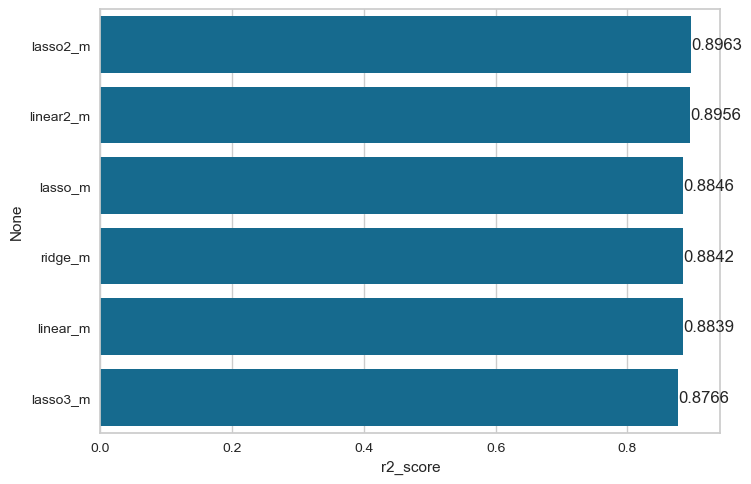

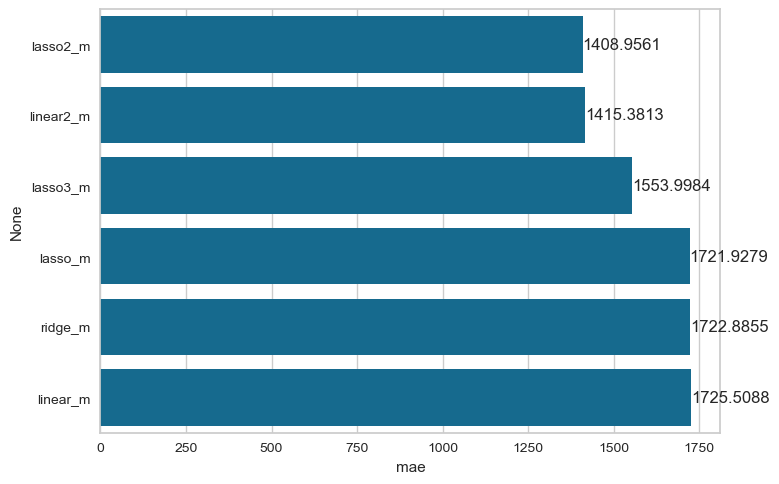

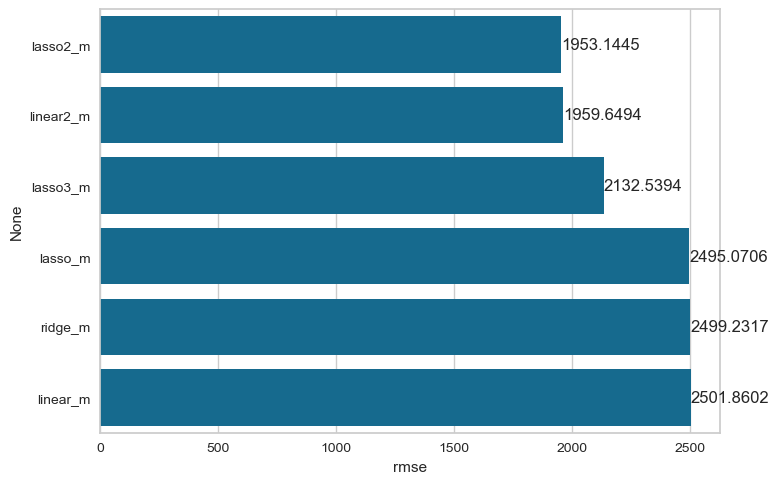

In [184]:
#metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False 
    else:
        ascending = True 
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

**Conclusion:**

- The lasso2_m model, which excludes outliers and applies Lasso regularization, consistently performs the best across all metrics (R², MAE, MSE), making it the most effective model.
- The final_m model, which includes feature selection, also shows good performance, particularly in MAE and MSE, but does not outperform lasso2_m.
- Regularization techniques like Lasso and Ridge improve model performance compared to the simple linear model, but removing outliers significantly enhances the results.

    - **Based on these metrics, the lasso2_m model is recommended for its superior accuracy and lower error rates.**

# Final Model
- As selected, the Lasso2 model will be used for the final model where we removed the outliers and applied Lasso regularization alpha=0.01

## Model

In [187]:
# Excluding rows where the price is greater than 35,000 using df_final
print(len(df[df.price > 35000]))

df2 = df[~(df.price > 35000)]

473


In [188]:
df2.shape

(13768, 133)

In [189]:
#Split the data

X = df2.drop(columns = "price")
y = df2.price

In [190]:
# Set the model and scaler with pipline

operations = [('scaler', MinMaxScaler()),('lasso', Lasso(alpha=1.02))]
final_model = Pipeline(steps=operations)
final_model.fit(X,y)

Pipeline(steps=[('scaler', MinMaxScaler()), ('lasso', Lasso(alpha=1.02))])

In [191]:
import pickle 

# To export the model
pickle.dump(final_model, open('AutoScout24','wb'))

In [192]:
final_model = pickle.load(open('AutoScout24','rb'))

## Predict New Observations

### Creating new samples for prediction

In [195]:
# Get the columns of the original dataset
columns = df2.drop(columns=['price']).columns

# Generate random values (using normal distribution)
n_samples = 5
n_features = len(columns)
random_data = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))

# Convert the new random data sample to a DataFrame
new_sample = pd.DataFrame(random_data, columns=columns)

print(new_sample.shape)
new_sample.head()

(5, 132)


,km,gears_num,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,fuel_cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG/CNG,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Part/Full Leather,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_front,drive_chain_rear
0,1.849,0.512,-0.221,1.035,-1.408,1.292,-0.764,-0.355,0.306,1.384,-0.788,0.925,-0.642,0.261,-0.698,-1.221,0.535,-0.230,0.764,-0.065,0.098,0.335,0.335,-0.305,2.334,-1.713,-1.057,-0.301,-0.095,-2.099,-0.497,0.093,0.153,1.860,-1.045,-1.252,-1.923,-0.311,-1.947,0.593,-0.189,1.454,0.412,0.431,-1.364,-0.086,0.114,-0.066,-0.565,-0.210,-0.593,1.666,0.143,-0.312,-0.889,-1.234,0.575,-1.045,-0.189,0.861,0.355,-0.804,-0.900,-1.713,-0.426,1.463,1.379,-1.368,2.730,0.092,-0.191,0.568,0.344,0.513,-1.007,-0.957,-0.089,0.341,-0.214,0.169,-0.455,0.763,0.950,-0.253,-0.303,0.430,0.595,0.772,-0.751,-0.284,0.324,-0.082,2.559,-0.190,1.941,0.124,-0.348,0.427,-0.800,0.842,-0.987,-0.900,1.941,0.787,-0.899,0.642,1.163,-0.382,0.449,2.171,0.564,-0.427,0.146,-1.003,1.498,1.224,-0.159,0.918,1.382,0.002,0.479,-0.906,-1.001,0.416,0.480,0.250,-0.271,1.643,1.788,-0.595,-1.151,0.148
1,-0.813,1.018,1.050,-1.217,-0.095,-0.963,-1.288,-0.475,0.673,0.103,-0.105,-2.549,-0.503,0.899,-0.371,1.028,0.880,0.899,1.651,-0.469,-0.940,-1.807,0.979,-0.071,0.247,-0.929,-0.676,-1.520,-0.754,-1.043,-1.055,-0.371,-1.243,-1.504,0.760,-0.519,-0.870,-0.731,0.232,1.187,0.596,-0.277,-0.212,-0.440,0.918,-0.707,-0.095,1.085,1.357,2.306,-0.561,-1.031,-0.009,0.705,-0.542,1.567,0.228,0.869,0.095,0.337,0.147,0.506,0.904,-0.008,0.906,-1.081,0.521,-0.575,2.255,-0.686,-0.094,0.522,-0.591,-0.484,-1.206,-0.007,-0.900,1.019,-0.479,-0

In [196]:
# Scale the new sample data using the pre-fitted MinMaxScaler

new_sample_scaled = final_model.named_steps['scaler'].transform(new_sample)

In [197]:
# Prediction

y_pred = final_model.predict(new_sample_scaled)

y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Prices'])
y_pred_df

,Predicted Prices
0,18206.963
1,16997.106
2,22352.095
3,8884.054
4,7519.689


<a id='import'></a>
<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h3 style='padding: 20px;
              color:white;
              text-align:center;'>
        Thank you...
    </h3>
    </div>

---

<div style="text-align: center;">
  <b>Akshay Shekade | Data Scientist | 2024 </b>
    
  <br>
  Follow me:
  <a href="https://akshayshekade.github.io/">Portfolio</a> | 
  <a href="https://www.linkedin.com/in/akshay-shekade-a225a8135/">Linkedin</a> | 
  <a href="https://github.com/AkshayShekade">GitHub</a> | 
  <a href="https://www.kaggle.com/akshayshekade">Kaggle</a> |
  <a href="https://public.tableau.com/app/profile/akshay.shekade/vizzes">Tableau</a>

    
</div>   